# FASE 1 - PREPROCESAMIENTO
# EXPERIMENTO 3

### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


In [2]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import shutil

### Funciones

In [3]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

### Listado de archivos

In [4]:
files = glob.glob('filtered_wv_models/*')
m = len(files)
print("Número de archivos en modelos", m)


Número de archivos en modelos 5425


### Matrices X e Y

In [5]:
print("--> X tiene dimensión", m, " x 201")
print("--> y tiene dimensión", m, " x 3")

y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Número de puntos en eje x: ", n_points)

--> X tiene dimensión 5425  x 201
--> y tiene dimensión 5425  x 3


(201,)

Número de puntos en eje x:  201


In [6]:
# X matriz, contiene línea espectral
X = np.zeros((m,n_points))
# y matriz, contiene las etiquetas de cada línea espectral
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")

f_t35000g20v280
t35000g20v280
('t35000', 'g', '20v280')
t: 35000
('20', 'v', '280')
g:  2.0
v: 280
f_t20000g20v260
t20000g20v260
('t20000', 'g', '20v260')
t: 20000
('20', 'v', '260')
g:  2.0
v: 260
f_t28000g20v350
t28000g20v350
('t28000', 'g', '20v350')
t: 28000
('20', 'v', '350')
g:  2.0
v: 350
f_t17000g30v170
t17000g30v170
('t17000', 'g', '30v170')
t: 17000
('30', 'v', '170')
g:  3.0
v: 170
f_t19000g45v220
t19000g45v220
('t19000', 'g', '45v220')
t: 19000
('45', 'v', '220')
g:  4.5
v: 220
f_t30000g45v230
t30000g45v230
('t30000', 'g', '45v230')
t: 30000
('45', 'v', '230')
g:  4.5
v: 230
f_t38000g45v300
t38000g45v300
('t38000', 'g', '45v300')
t: 38000
('45', 'v', '300')
g:  4.5
v: 300
f_t17000g20v170
t17000g20v170
('t17000', 'g', '20v170')
t: 17000
('20', 'v', '170')
g:  2.0
v: 170
f_t20000g30v260
t20000g30v260
('t20000', 'g', '30v260')
t: 20000
('30', 'v', '260')
g:  3.0
v: 260
f_t35000g30v280
t35000g30v280
('t35000', 'g', '30v280')
t: 35000
('30', 'v', '280')
g:  3.0
v: 280
f_t28000g3

t29000g20v160
('t29000', 'g', '20v160')
t: 29000
('20', 'v', '160')
g:  2.0
v: 160
f_t39000g45v130
t39000g45v130
('t39000', 'g', '45v130')
t: 39000
('45', 'v', '130')
g:  4.5
v: 130
f_t22000g40v150
t22000g40v150
('t22000', 'g', '40v150')
t: 22000
('40', 'v', '150')
g:  4.0
v: 150
f_t34000g50v360
t34000g50v360
('t34000', 'g', '50v360')
t: 34000
('50', 'v', '360')
g:  5.0
v: 360
f_t21000g50v380
t21000g50v380
('t21000', 'g', '50v380')
t: 21000
('50', 'v', '380')
g:  5.0
v: 380
f_t15000g50v240
t15000g50v240
('t15000', 'g', '50v240')
t: 15000
('50', 'v', '240')
g:  5.0
v: 240
f_t24000g35v330
t24000g35v330
('t24000', 'g', '35v330')
t: 24000
('35', 'v', '330')
g:  3.5
v: 330
f_t32000g25v100
t32000g25v100
('t32000', 'g', '25v100')
t: 32000
('25', 'v', '100')
g:  2.5
v: 100
f_t21000g40v380
t21000g40v380
('t21000', 'g', '40v380')
t: 21000
('40', 'v', '380')
g:  4.0
v: 380
f_t34000g40v360
t34000g40v360
('t34000', 'g', '40v360')
t: 34000
('40', 'v', '360')
g:  4.0
v: 360
f_t15000g40v240
t15000g40v

t38000g20v180
('t38000', 'g', '20v180')
t: 38000
('20', 'v', '180')
g:  2.0
v: 180
f_t26000g30v280
t26000g30v280
('t26000', 'g', '30v280')
t: 26000
('30', 'v', '280')
g:  3.0
v: 280
f_t33000g30v260
t33000g30v260
('t33000', 'g', '30v260')
t: 33000
('30', 'v', '260')
g:  3.0
v: 260
f_t31000g25v110
t31000g25v110
('t31000', 'g', '25v110')
t: 31000
('25', 'v', '110')
g:  2.5
v: 110
f_t18000g25v100
t18000g25v100
('t18000', 'g', '25v100')
t: 18000
('25', 'v', '100')
g:  2.5
v: 100
f_t27000g35v320
t27000g35v320
('t27000', 'g', '35v320')
t: 27000
('35', 'v', '320')
g:  3.5
v: 320
f_t16000g50v250
t16000g50v250
('t16000', 'g', '50v250')
t: 16000
('50', 'v', '250')
g:  5.0
v: 250
f_t37000g50v370
t37000g50v370
('t37000', 'g', '50v370')
t: 37000
('50', 'v', '370')
g:  5.0
v: 370
f_t22000g50v390
t22000g50v390
('t22000', 'g', '50v390')
t: 22000
('50', 'v', '390')
g:  5.0
v: 390
f_t21000g40v140
t21000g40v140
('t21000', 'g', '40v140')
t: 21000
('40', 'v', '140')
g:  4.0
v: 140
f_t25000g45v400
t25000g45v

t31000g40v150
('t31000', 'g', '40v150')
t: 31000
('40', 'v', '150')
g:  4.0
v: 150
f_t32000g50v380
t32000g50v380
('t32000', 'g', '50v380')
t: 32000
('50', 'v', '380')
g:  5.0
v: 380
f_t27000g50v360
t27000g50v360
('t27000', 'g', '50v360')
t: 27000
('50', 'v', '360')
g:  5.0
v: 360
f_t16000g35v210
t16000g35v210
('t16000', 'g', '35v210')
t: 16000
('35', 'v', '210')
g:  3.5
v: 210
f_t37000g35v330
t37000g35v330
('t37000', 'g', '35v330')
t: 37000
('35', 'v', '330')
g:  3.5
v: 330
f_t21000g25v100
t21000g25v100
('t21000', 'g', '25v100')
t: 21000
('25', 'v', '100')
g:  2.5
v: 100
f_t27000g40v360
t27000g40v360
('t27000', 'g', '40v360')
t: 27000
('40', 'v', '360')
g:  4.0
v: 360
f_t32000g40v380
t32000g40v380
('t32000', 'g', '40v380')
t: 32000
('40', 'v', '380')
g:  4.0
v: 380
f_t31000g50v150
t31000g50v150
('t31000', 'g', '50v150')
t: 31000
('50', 'v', '150')
g:  5.0
v: 150
f_t18000g50v140
t18000g50v140
('t18000', 'g', '50v140')
t: 18000
('50', 'v', '140')
g:  5.0
v: 140
f_t21000g35v100
t21000g35v

t28000g40v120
('t28000', 'g', '40v120')
t: 28000
('40', 'v', '120')
g:  4.0
v: 120
f_t38000g25v170
t38000g25v170
('t38000', 'g', '25v170')
t: 38000
('25', 'v', '170')
g:  2.5
v: 170
f_t26000g35v270
t26000g35v270
('t26000', 'g', '35v270')
t: 26000
('35', 'v', '270')
g:  3.5
v: 270
f_t33000g35v290
t33000g35v290
('t33000', 'g', '35v290')
t: 33000
('35', 'v', '290')
g:  3.5
v: 290
f_t28000g50v120
t28000g50v120
('t28000', 'g', '50v120')
t: 28000
('50', 'v', '120')
g:  5.0
v: 120
f_t36000g40v220
t36000g40v220
('t36000', 'g', '40v220')
t: 36000
('40', 'v', '220')
g:  4.0
v: 220
f_t17000g40v300
t17000g40v300
('t17000', 'g', '40v300')
t: 17000
('40', 'v', '300')
g:  4.0
v: 300
f_t33000g25v290
t33000g25v290
('t33000', 'g', '25v290')
t: 33000
('25', 'v', '290')
g:  2.5
v: 290
f_t26000g25v270
t26000g25v270
('t26000', 'g', '25v270')
t: 26000
('25', 'v', '270')
g:  2.5
v: 270
f_t38000g35v170
t38000g35v170
('t38000', 'g', '35v170')
t: 38000
('35', 'v', '170')
g:  3.5
v: 170
f_t28000g30v390
t28000g30v

t22000g50v190
('t22000', 'g', '50v190')
t: 22000
('50', 'v', '190')
g:  5.0
v: 190
f_t15000g40v280
t15000g40v280
('t15000', 'g', '40v280')
t: 15000
('40', 'v', '280')
g:  4.0
v: 280
f_t29000g40v270
t29000g40v270
('t29000', 'g', '40v270')
t: 29000
('40', 'v', '270')
g:  4.0
v: 270
f_t21000g40v340
t21000g40v340
('t21000', 'g', '40v340')
t: 21000
('40', 'v', '340')
g:  4.0
v: 340
f_t27000g25v120
t27000g25v120
('t27000', 'g', '25v120')
t: 27000
('25', 'v', '120')
g:  2.5
v: 120
f_t39000g35v220
t39000g35v220
('t39000', 'g', '35v220')
t: 39000
('35', 'v', '220')
g:  3.5
v: 220
f_t18000g35v300
t18000g35v300
('t18000', 'g', '35v300')
t: 18000
('35', 'v', '300')
g:  3.5
v: 300
f_t31000g35v310
t31000g35v310
('t31000', 'g', '35v310')
t: 31000
('35', 'v', '310')
g:  3.5
v: 310
f_t15000g50v280
t15000g50v280
('t15000', 'g', '50v280')
t: 15000
('50', 'v', '280')
g:  5.0
v: 280
f_t29000g50v270
t29000g50v270
('t29000', 'g', '50v270')
t: 29000
('50', 'v', '270')
g:  5.0
v: 270
f_t21000g50v340
t21000g50v

t34000g40v160
('t34000', 'g', '40v160')
t: 34000
('40', 'v', '160')
g:  4.0
v: 160
f_t22000g50v350
t22000g50v350
('t22000', 'g', '50v350')
t: 22000
('50', 'v', '350')
g:  5.0
v: 350
f_t16000g50v290
t16000g50v290
('t16000', 'g', '50v290')
t: 16000
('50', 'v', '290')
g:  5.0
v: 290
f_t32000g35v300
t32000g35v300
('t32000', 'g', '35v300')
t: 32000
('35', 'v', '300')
g:  3.5
v: 300
f_t24000g25v130
t24000g25v130
('t24000', 'g', '25v130')
t: 24000
('25', 'v', '130')
g:  2.5
v: 130
f_t23000g50v160
t23000g50v160
('t23000', 'g', '50v160')
t: 23000
('50', 'v', '160')
g:  5.0
v: 160
f_t36000g50v180
t36000g50v180
('t36000', 'g', '50v180')
t: 36000
('50', 'v', '180')
g:  5.0
v: 180
f_t35000g40v350
t35000g40v350
('t35000', 'g', '40v350')
t: 35000
('40', 'v', '350')
g:  4.0
v: 350
f_t28000g40v280
t28000g40v280
('t28000', 'g', '40v280')
t: 28000
('40', 'v', '280')
g:  4.0
v: 280
f_t25000g25v300
t25000g25v300
('t25000', 'g', '25v300')
t: 25000
('25', 'v', '300')
g:  2.5
v: 300
f_t33000g35v130
t33000g35v

t29000g30v360
('t29000', 'g', '30v360')
t: 29000
('30', 'v', '360')
g:  3.0
v: 360
f_t15000g30v390
t15000g30v390
('t15000', 'g', '30v390')
t: 15000
('30', 'v', '390')
g:  3.0
v: 390
f_t16000g20v140
t16000g20v140
('t16000', 'g', '20v140')
t: 16000
('20', 'v', '140')
g:  2.0
v: 140
f_t16000g30v140
t16000g30v140
('t16000', 'g', '30v140')
t: 16000
('30', 'v', '140')
g:  3.0
v: 140
f_t21000g20v250
t21000g20v250
('t21000', 'g', '20v250')
t: 21000
('20', 'v', '250')
g:  2.0
v: 250
f_t29000g20v360
t29000g20v360
('t29000', 'g', '20v360')
t: 29000
('20', 'v', '360')
g:  2.0
v: 360
f_t15000g20v390
t15000g20v390
('t15000', 'g', '20v390')
t: 15000
('20', 'v', '390')
g:  2.0
v: 390
f_t31000g45v200
t31000g45v200
('t31000', 'g', '45v200')
t: 31000
('45', 'v', '200')
g:  4.5
v: 200
f_t18000g45v210
t18000g45v210
('t18000', 'g', '45v210')
t: 18000
('45', 'v', '210')
g:  4.5
v: 210
f_t39000g45v330
t39000g45v330
('t39000', 'g', '45v330')
t: 39000
('45', 'v', '330')
g:  4.5
v: 330
f_t23000g35v120
t23000g35v

t27000g30v100
('t27000', 'g', '30v100')
t: 27000
('30', 'v', '100')
g:  3.0
v: 100
f_t31000g20v330
t31000g20v330
('t31000', 'g', '20v330')
t: 31000
('20', 'v', '330')
g:  2.0
v: 330
f_t18000g20v320
t18000g20v320
('t18000', 'g', '20v320')
t: 18000
('20', 'v', '320')
g:  2.0
v: 320
f_t39000g20v200
t39000g20v200
('t39000', 'g', '20v200')
t: 39000
('20', 'v', '200')
g:  2.0
v: 200
f_t21000g45v360
t21000g45v360
('t21000', 'g', '45v360')
t: 21000
('45', 'v', '360')
g:  4.5
v: 360
f_t34000g45v380
t34000g45v380
('t34000', 'g', '45v380')
t: 34000
('45', 'v', '380')
g:  4.5
v: 380
f_t29000g45v250
t29000g45v250
('t29000', 'g', '45v250')
t: 29000
('45', 'v', '250')
g:  4.5
v: 250
f_t18000g30v320
t18000g30v320
('t18000', 'g', '30v320')
t: 18000
('30', 'v', '320')
g:  3.0
v: 320
f_t31000g30v330
t31000g30v330
('t31000', 'g', '30v330')
t: 31000
('30', 'v', '330')
g:  3.0
v: 330
f_t39000g30v200
t39000g30v200
('t39000', 'g', '30v200')
t: 39000
('30', 'v', '200')
g:  3.0
v: 200
f_t27000g20v100
t27000g20v

t37000g30v110
('t37000', 'g', '30v110')
t: 37000
('30', 'v', '110')
g:  3.0
v: 110
f_t27000g45v140
t27000g45v140
('t27000', 'g', '45v140')
t: 27000
('45', 'v', '140')
g:  4.5
v: 140
f_t37000g20v110
t37000g20v110
('t37000', 'g', '20v110')
t: 37000
('20', 'v', '110')
g:  2.0
v: 110
f_t21000g30v320
t21000g30v320
('t21000', 'g', '30v320')
t: 21000
('30', 'v', '320')
g:  3.0
v: 320
f_t23000g50v400
t23000g50v400
('t23000', 'g', '50v400')
t: 23000
('50', 'v', '400')
g:  5.0
v: 400
f_t29000g30v210
t29000g30v210
('t29000', 'g', '30v210')
t: 29000
('30', 'v', '210')
g:  3.0
v: 210
f_t25000g50v230
t25000g50v230
('t25000', 'g', '50v230')
t: 25000
('50', 'v', '230')
g:  5.0
v: 230
f_t17000g25v190
t17000g25v190
('t17000', 'g', '25v190')
t: 17000
('25', 'v', '190')
g:  2.5
v: 190
f_t20000g35v280
t20000g35v280
('t20000', 'g', '35v280')
t: 20000
('35', 'v', '280')
g:  3.5
v: 280
f_t35000g35v260
t35000g35v260
('t35000', 'g', '35v260')
t: 35000
('35', 'v', '260')
g:  3.5
v: 260
f_t25000g40v230
t25000g40v

t26000g50v220
('t26000', 'g', '50v220')
t: 26000
('50', 'v', '220')
g:  5.0
v: 220
f_t28000g35v170
t28000g35v170
('t28000', 'g', '35v170')
t: 28000
('35', 'v', '170')
g:  3.5
v: 170
f_t17000g25v350
t17000g25v350
('t17000', 'g', '25v350')
t: 17000
('25', 'v', '350')
g:  2.5
v: 350
f_t36000g25v270
t36000g25v270
('t36000', 'g', '25v270')
t: 36000
('25', 'v', '270')
g:  2.5
v: 270
f_t23000g25v290
t23000g25v290
('t23000', 'g', '25v290')
t: 23000
('25', 'v', '290')
g:  2.5
v: 290
f_t26000g40v220
t26000g40v220
('t26000', 'g', '40v220')
t: 26000
('40', 'v', '220')
g:  4.0
v: 220
f_t38000g50v120
t38000g50v120
('t38000', 'g', '50v120')
t: 38000
('50', 'v', '120')
g:  5.0
v: 120
f_t34000g30v100
t34000g30v100
('t34000', 'g', '30v100')
t: 34000
('30', 'v', '100')
g:  3.0
v: 100
f_t22000g20v330
t22000g20v330
('t22000', 'g', '20v330')
t: 22000
('20', 'v', '330')
g:  2.0
v: 330
f_t27000g45v380
t27000g45v380
('t27000', 'g', '45v380')
t: 27000
('45', 'v', '380')
g:  4.5
v: 380
f_t32000g45v360
t32000g45v

t36000g50v230
('t36000', 'g', '50v230')
t: 36000
('50', 'v', '230')
g:  5.0
v: 230
f_t28000g40v130
t28000g40v130
('t28000', 'g', '40v130')
t: 28000
('40', 'v', '130')
g:  4.0
v: 130
f_t38000g25v160
t38000g25v160
('t38000', 'g', '25v160')
t: 38000
('25', 'v', '160')
g:  2.5
v: 160
f_t26000g35v260
t26000g35v260
('t26000', 'g', '35v260')
t: 26000
('35', 'v', '260')
g:  3.5
v: 260
f_t33000g35v280
t33000g35v280
('t33000', 'g', '35v280')
t: 33000
('35', 'v', '280')
g:  3.5
v: 280
f_t28000g50v130
t28000g50v130
('t28000', 'g', '50v130')
t: 28000
('50', 'v', '130')
g:  5.0
v: 130
f_t17000g40v310
t17000g40v310
('t17000', 'g', '40v310')
t: 17000
('40', 'v', '310')
g:  4.0
v: 310
f_t36000g40v230
t36000g40v230
('t36000', 'g', '40v230')
t: 36000
('40', 'v', '230')
g:  4.0
v: 230
f_t33000g25v280
t33000g25v280
('t33000', 'g', '25v280')
t: 33000
('25', 'v', '280')
g:  2.5
v: 280
f_t26000g25v260
t26000g25v260
('t26000', 'g', '25v260')
t: 26000
('25', 'v', '260')
g:  2.5
v: 260
f_t38000g35v160
t38000g35v

t23000g20v260
('t23000', 'g', '20v260')
t: 23000
('20', 'v', '260')
g:  2.0
v: 260
f_t23000g30v260
t23000g30v260
('t23000', 'g', '30v260')
t: 23000
('30', 'v', '260')
g:  3.0
v: 260
f_t36000g30v280
t36000g30v280
('t36000', 'g', '30v280')
t: 36000
('30', 'v', '280')
g:  3.0
v: 280
f_t28000g20v180
t28000g20v180
('t28000', 'g', '20v180')
t: 28000
('20', 'v', '180')
g:  2.0
v: 180
f_t30000g35v330
t30000g35v330
('t30000', 'g', '35v330')
t: 30000
('35', 'v', '330')
g:  3.5
v: 330
f_t19000g35v320
t19000g35v320
('t19000', 'g', '35v320')
t: 19000
('35', 'v', '320')
g:  3.5
v: 320
f_t38000g35v200
t38000g35v200
('t38000', 'g', '35v200')
t: 38000
('35', 'v', '200')
g:  3.5
v: 200
f_t26000g25v100
t26000g25v100
('t26000', 'g', '25v100')
t: 26000
('25', 'v', '100')
g:  2.5
v: 100
f_t36000g40v150
t36000g40v150
('t36000', 'g', '40v150')
t: 36000
('40', 'v', '150')
g:  4.0
v: 150
f_t20000g50v360
t20000g50v360
('t20000', 'g', '50v360')
t: 20000
('50', 'v', '360')
g:  5.0
v: 360
f_t35000g50v380
t35000g50v

t34000g25v250
('t34000', 'g', '25v250')
t: 34000
('25', 'v', '250')
g:  2.5
v: 250
f_t29000g25v380
t29000g25v380
('t29000', 'g', '25v380')
t: 29000
('25', 'v', '380')
g:  2.5
v: 380
f_t15000g25v370
t15000g25v370
('t15000', 'g', '25v370')
t: 15000
('25', 'v', '370')
g:  2.5
v: 370
f_t24000g50v200
t24000g50v200
('t24000', 'g', '50v200')
t: 24000
('50', 'v', '200')
g:  5.0
v: 200
f_t34000g35v250
t34000g35v250
('t34000', 'g', '35v250')
t: 34000
('35', 'v', '250')
g:  3.5
v: 250
f_t29000g35v380
t29000g35v380
('t29000', 'g', '35v380')
t: 29000
('35', 'v', '380')
g:  3.5
v: 380
f_t15000g35v370
t15000g35v370
('t15000', 'g', '35v370')
t: 15000
('35', 'v', '370')
g:  3.5
v: 370
f_t33000g40v200
t33000g40v200
('t33000', 'g', '40v200')
t: 33000
('40', 'v', '200')
g:  4.0
v: 200
f_t23000g25v250
t23000g25v250
('t23000', 'g', '25v250')
t: 23000
('25', 'v', '250')
g:  2.5
v: 250
f_t17000g25v390
t17000g25v390
('t17000', 'g', '25v390')
t: 17000
('25', 'v', '390')
g:  2.5
v: 390
f_t33000g50v200
t33000g50v

t16000g45v270
('t16000', 'g', '45v270')
t: 16000
('45', 'v', '270')
g:  4.5
v: 270
f_t33000g25v240
t33000g25v240
('t33000', 'g', '25v240')
t: 33000
('25', 'v', '240')
g:  2.5
v: 240
f_t23000g40v210
t23000g40v210
('t23000', 'g', '40v210')
t: 23000
('40', 'v', '210')
g:  4.0
v: 210
f_t29000g20v400
t29000g20v400
('t29000', 'g', '20v400')
t: 29000
('20', 'v', '400')
g:  2.0
v: 400
f_t33000g35v240
t33000g35v240
('t33000', 'g', '35v240')
t: 33000
('35', 'v', '240')
g:  3.5
v: 240
f_t29000g30v400
t29000g30v400
('t29000', 'g', '30v400')
t: 29000
('30', 'v', '400')
g:  3.0
v: 400
f_t23000g50v210
t23000g50v210
('t23000', 'g', '50v210')
t: 23000
('50', 'v', '210')
g:  5.0
v: 210
f_t28000g20v340
t28000g20v340
('t28000', 'g', '20v340')
t: 28000
('20', 'v', '340')
g:  2.0
v: 340
f_t35000g20v290
t35000g20v290
('t35000', 'g', '20v290')
t: 35000
('20', 'v', '290')
g:  2.0
v: 290
f_t20000g20v270
t20000g20v270
('t20000', 'g', '20v270')
t: 20000
('20', 'v', '270')
g:  2.0
v: 270
f_t17000g30v160
t17000g30v

t16000g40v150
('t16000', 'g', '40v150')
t: 16000
('40', 'v', '150')
g:  4.0
v: 150
f_t31000g35v210
t31000g35v210
('t31000', 'g', '35v210')
t: 31000
('35', 'v', '210')
g:  3.5
v: 210
f_t18000g35v200
t18000g35v200
('t18000', 'g', '35v200')
t: 18000
('35', 'v', '200')
g:  3.5
v: 200
f_t39000g35v320
t39000g35v320
('t39000', 'g', '35v320')
t: 39000
('35', 'v', '320')
g:  3.5
v: 320
f_t23000g45v130
t23000g45v130
('t23000', 'g', '45v130')
t: 23000
('45', 'v', '130')
g:  4.5
v: 130
f_t26000g20v180
t26000g20v180
('t26000', 'g', '20v180')
t: 26000
('20', 'v', '180')
g:  2.0
v: 180
f_t33000g20v160
t33000g20v160
('t33000', 'g', '20v160')
t: 33000
('20', 'v', '160')
g:  2.0
v: 160
f_t25000g30v350
t25000g30v350
('t25000', 'g', '30v350')
t: 25000
('30', 'v', '350')
g:  3.0
v: 350
f_t38000g30v280
t38000g30v280
('t38000', 'g', '30v280')
t: 38000
('30', 'v', '280')
g:  3.0
v: 280
f_t35000g45v300
t35000g45v300
('t35000', 'g', '45v300')
t: 35000
('45', 'v', '300')
g:  4.5
v: 300
f_t25000g20v350
t25000g20v

t37000g20v160
('t37000', 'g', '20v160')
t: 37000
('20', 'v', '160')
g:  2.0
v: 160
f_t22000g20v180
t22000g20v180
('t22000', 'g', '20v180')
t: 22000
('20', 'v', '180')
g:  2.0
v: 180
f_t39000g45v230
t39000g45v230
('t39000', 'g', '45v230')
t: 39000
('45', 'v', '230')
g:  4.5
v: 230
f_t18000g45v310
t18000g45v310
('t18000', 'g', '45v310')
t: 18000
('45', 'v', '310')
g:  4.5
v: 310
f_t31000g45v300
t31000g45v300
('t31000', 'g', '45v300')
t: 31000
('45', 'v', '300')
g:  4.5
v: 300
f_t22000g30v180
t22000g30v180
('t22000', 'g', '30v180')
t: 22000
('30', 'v', '180')
g:  3.0
v: 180
f_t37000g30v160
t37000g30v160
('t37000', 'g', '30v160')
t: 37000
('30', 'v', '160')
g:  3.0
v: 160
f_t29000g20v260
t29000g20v260
('t29000', 'g', '20v260')
t: 29000
('20', 'v', '260')
g:  2.0
v: 260
f_t15000g20v290
t15000g20v290
('t15000', 'g', '20v290')
t: 15000
('20', 'v', '290')
g:  2.0
v: 290
f_t21000g20v350
t21000g20v350
('t21000', 'g', '20v350')
t: 21000
('20', 'v', '350')
g:  2.0
v: 350
f_t38000g40v390
t38000g40v

f_t34000g25v140
t34000g25v140
('t34000', 'g', '25v140')
t: 34000
('25', 'v', '140')
g:  2.5
v: 140
f_t24000g40v110
t24000g40v110
('t24000', 'g', '40v110')
t: 24000
('40', 'v', '110')
g:  4.0
v: 110
f_t32000g50v320
t32000g50v320
('t32000', 'g', '50v320')
t: 32000
('50', 'v', '320')
g:  5.0
v: 320
f_t30000g30v400
t30000g30v400
('t30000', 'g', '30v400')
t: 30000
('30', 'v', '400')
g:  3.0
v: 400
f_t34000g35v140
t34000g35v140
('t34000', 'g', '35v140')
t: 34000
('35', 'v', '140')
g:  3.5
v: 140
f_t37000g25v390
t37000g25v390
('t37000', 'g', '25v390')
t: 37000
('25', 'v', '390')
g:  2.5
v: 390
f_t22000g25v370
t22000g25v370
('t22000', 'g', '25v370')
t: 22000
('25', 'v', '370')
g:  2.5
v: 370
f_t32000g40v320
t32000g40v320
('t32000', 'g', '40v320')
t: 32000
('40', 'v', '320')
g:  4.0
v: 320
f_t30000g20v400
t30000g20v400
('t30000', 'g', '20v400')
t: 30000
('20', 'v', '400')
g:  2.0
v: 400
f_t24000g50v110
t24000g50v110
('t24000', 'g', '50v110')
t: 24000
('50', 'v', '110')
g:  5.0
v: 110
f_t28000g3

t28000g50v180
('t28000', 'g', '50v180')
t: 28000
('50', 'v', '180')
g:  5.0
v: 180
f_t23000g40v260
t23000g40v260
('t23000', 'g', '40v260')
t: 23000
('40', 'v', '260')
g:  4.0
v: 260
f_t36000g40v280
t36000g40v280
('t36000', 'g', '40v280')
t: 36000
('40', 'v', '280')
g:  4.0
v: 280
f_t24000g35v230
t24000g35v230
('t24000', 'g', '35v230')
t: 24000
('35', 'v', '230')
g:  3.5
v: 230
f_t16000g40v190
t16000g40v190
('t16000', 'g', '40v190')
t: 16000
('40', 'v', '190')
g:  4.0
v: 190
f_t15000g50v340
t15000g50v340
('t15000', 'g', '50v340')
t: 15000
('50', 'v', '340')
g:  5.0
v: 340
f_t21000g50v280
t21000g50v280
('t21000', 'g', '50v280')
t: 21000
('50', 'v', '280')
g:  5.0
v: 280
f_t34000g50v260
t34000g50v260
('t34000', 'g', '50v260')
t: 34000
('50', 'v', '260')
g:  5.0
v: 260
f_t24000g25v230
t24000g25v230
('t24000', 'g', '25v230')
t: 24000
('25', 'v', '230')
g:  2.5
v: 230
f_t15000g40v340
t15000g40v340
('t15000', 'g', '40v340')
t: 15000
('40', 'v', '340')
g:  4.0
v: 340
f_t34000g40v260
t34000g40v

t35000g30v380
('t35000', 'g', '30v380')
t: 35000
('30', 'v', '380')
g:  3.0
v: 380
f_t20000g30v360
t20000g30v360
('t20000', 'g', '30v360')
t: 20000
('30', 'v', '360')
g:  3.0
v: 360
f_t18000g50v280
t18000g50v280
('t18000', 'g', '50v280')
t: 18000
('50', 'v', '280')
g:  5.0
v: 280
f_t24000g50v270
t24000g50v270
('t24000', 'g', '50v270')
t: 24000
('50', 'v', '270')
g:  5.0
v: 270
f_t31000g50v290
t31000g50v290
('t31000', 'g', '50v290')
t: 31000
('50', 'v', '290')
g:  5.0
v: 290
f_t15000g35v300
t15000g35v300
('t15000', 'g', '35v300')
t: 15000
('35', 'v', '300')
g:  3.5
v: 300
f_t34000g35v220
t34000g35v220
('t34000', 'g', '35v220')
t: 34000
('35', 'v', '220')
g:  3.5
v: 220
f_t31000g40v290
t31000g40v290
('t31000', 'g', '40v290')
t: 31000
('40', 'v', '290')
g:  4.0
v: 290
f_t18000g40v280
t18000g40v280
('t18000', 'g', '40v280')
t: 18000
('40', 'v', '280')
g:  4.0
v: 280
f_t24000g40v270
t24000g40v270
('t24000', 'g', '40v270')
t: 24000
('40', 'v', '270')
g:  4.0
v: 270
f_t15000g25v300
t15000g25v

t33000g25v190
('t33000', 'g', '25v190')
t: 33000
('25', 'v', '190')
g:  2.5
v: 190
f_t38000g35v270
t38000g35v270
('t38000', 'g', '35v270')
t: 38000
('35', 'v', '270')
g:  3.5
v: 270
f_t30000g35v340
t30000g35v340
('t30000', 'g', '35v340')
t: 30000
('35', 'v', '340')
g:  3.5
v: 340
f_t19000g35v350
t19000g35v350
('t19000', 'g', '35v350')
t: 19000
('35', 'v', '350')
g:  3.5
v: 350
f_t28000g50v220
t28000g50v220
('t28000', 'g', '50v220')
t: 28000
('50', 'v', '220')
g:  5.0
v: 220
f_t20000g50v310
t20000g50v310
('t20000', 'g', '50v310')
t: 20000
('50', 'v', '310')
g:  5.0
v: 310
f_t36000g40v120
t36000g40v120
('t36000', 'g', '40v120')
t: 36000
('40', 'v', '120')
g:  4.0
v: 120
f_t24000g30v200
t24000g30v200
('t24000', 'g', '30v200')
t: 24000
('30', 'v', '200')
g:  3.0
v: 200
f_t24000g20v200
t24000g20v200
('t24000', 'g', '20v200')
t: 24000
('20', 'v', '200')
g:  2.0
v: 200
f_t29000g45v380
t29000g45v380
('t29000', 'g', '45v380')
t: 29000
('45', 'v', '380')
g:  4.5
v: 380
f_t15000g45v370
t15000g45v

t36000g35v160
('t36000', 'g', '35v160')
t: 36000
('35', 'v', '160')
g:  3.5
v: 160
f_t23000g35v180
t23000g35v180
('t23000', 'g', '35v180')
t: 23000
('35', 'v', '180')
g:  3.5
v: 180
f_t28000g25v260
t28000g25v260
('t28000', 'g', '25v260')
t: 28000
('25', 'v', '260')
g:  2.5
v: 260
f_t20000g25v350
t20000g25v350
('t20000', 'g', '25v350')
t: 20000
('25', 'v', '350')
g:  2.5
v: 350
f_t26000g40v130
t26000g40v130
('t26000', 'g', '40v130')
t: 26000
('40', 'v', '130')
g:  4.0
v: 130
f_t38000g50v230
t38000g50v230
('t38000', 'g', '50v230')
t: 38000
('50', 'v', '230')
g:  5.0
v: 230
f_t19000g50v310
t19000g50v310
('t19000', 'g', '50v310')
t: 19000
('50', 'v', '310')
g:  5.0
v: 310
f_t30000g50v300
t30000g50v300
('t30000', 'g', '50v300')
t: 30000
('50', 'v', '300')
g:  5.0
v: 300
f_t28000g35v260
t28000g35v260
('t28000', 'g', '35v260')
t: 28000
('35', 'v', '260')
g:  3.5
v: 260
f_t20000g35v350
t20000g35v350
('t20000', 'g', '35v350')
t: 20000
('35', 'v', '350')
g:  3.5
v: 350
f_t23000g25v180
t23000g25v

t34000g25v190
('t34000', 'g', '25v190')
t: 34000
('25', 'v', '190')
g:  2.5
v: 190
f_t21000g25v170
t21000g25v170
('t21000', 'g', '25v170')
t: 21000
('25', 'v', '170')
g:  2.5
v: 170
f_t37000g35v340
t37000g35v340
('t37000', 'g', '35v340')
t: 37000
('35', 'v', '340')
g:  3.5
v: 340
f_t16000g35v260
t16000g35v260
('t16000', 'g', '35v260')
t: 16000
('35', 'v', '260')
g:  3.5
v: 260
f_t23000g30v200
t23000g30v200
('t23000', 'g', '30v200')
t: 23000
('30', 'v', '200')
g:  3.0
v: 200
f_t33000g45v250
t33000g45v250
('t33000', 'g', '45v250')
t: 33000
('45', 'v', '250')
g:  4.5
v: 250
f_t23000g20v200
t23000g20v200
('t23000', 'g', '20v200')
t: 23000
('20', 'v', '200')
g:  2.0
v: 200
f_t19000g25v340
t19000g25v340
('t19000', 'g', '25v340')
t: 19000
('25', 'v', '340')
g:  2.5
v: 340
f_t30000g25v350
t30000g25v350
('t30000', 'g', '25v350')
t: 30000
('25', 'v', '350')
g:  2.5
v: 350
f_t38000g25v260
t38000g25v260
('t38000', 'g', '25v260')
t: 38000
('25', 'v', '260')
g:  2.5
v: 260
f_t33000g35v180
t33000g35v

t27000g25v350
('t27000', 'g', '25v350')
t: 27000
('25', 'v', '350')
g:  2.5
v: 350
f_t37000g40v300
t37000g40v300
('t37000', 'g', '40v300')
t: 37000
('40', 'v', '300')
g:  4.0
v: 300
f_t16000g40v220
t16000g40v220
('t16000', 'g', '40v220')
t: 16000
('40', 'v', '220')
g:  4.0
v: 220
f_t21000g50v130
t21000g50v130
('t21000', 'g', '50v130')
t: 21000
('50', 'v', '130')
g:  5.0
v: 130
f_t27000g35v350
t27000g35v350
('t27000', 'g', '35v350')
t: 27000
('35', 'v', '350')
g:  3.5
v: 350
f_t31000g25v160
t31000g25v160
('t31000', 'g', '25v160')
t: 31000
('25', 'v', '160')
g:  2.5
v: 160
f_t18000g25v170
t18000g25v170
('t18000', 'g', '25v170')
t: 18000
('25', 'v', '170')
g:  2.5
v: 170
f_t24000g25v180
t24000g25v180
('t24000', 'g', '25v180')
t: 24000
('25', 'v', '180')
g:  2.5
v: 180
f_t21000g40v130
t21000g40v130
('t21000', 'g', '40v130')
t: 21000
('40', 'v', '130')
g:  4.0
v: 130
f_t37000g50v300
t37000g50v300
('t37000', 'g', '50v300')
t: 37000
('50', 'v', '300')
g:  5.0
v: 300
f_t16000g50v220
t16000g50v

t32000g25v170
('t32000', 'g', '25v170')
t: 32000
('25', 'v', '170')
g:  2.5
v: 170
f_t27000g25v190
t27000g25v190
('t27000', 'g', '25v190')
t: 27000
('25', 'v', '190')
g:  2.5
v: 190
f_t39000g35v290
t39000g35v290
('t39000', 'g', '35v290')
t: 39000
('35', 'v', '290')
g:  3.5
v: 290
f_t24000g35v340
t24000g35v340
('t24000', 'g', '35v340')
t: 24000
('35', 'v', '340')
g:  3.5
v: 340
f_t17000g45v140
t17000g45v140
('t17000', 'g', '45v140')
t: 17000
('45', 'v', '140')
g:  4.5
v: 140
f_t38000g30v330
t38000g30v330
('t38000', 'g', '30v330')
t: 38000
('30', 'v', '330')
g:  3.0
v: 330
f_t19000g30v210
t19000g30v210
('t19000', 'g', '30v210')
t: 19000
('30', 'v', '210')
g:  3.0
v: 210
f_t30000g30v200
t30000g30v200
('t30000', 'g', '30v200')
t: 30000
('30', 'v', '200')
g:  3.0
v: 200
f_t28000g45v360
t28000g45v360
('t28000', 'g', '45v360')
t: 28000
('45', 'v', '360')
g:  4.5
v: 360
f_t20000g45v250
t20000g45v250
('t20000', 'g', '45v250')
t: 20000
('45', 'v', '250')
g:  4.5
v: 250
f_t38000g20v330
t38000g20v

t30000g45v240
('t30000', 'g', '45v240')
t: 30000
('45', 'v', '240')
g:  4.5
v: 240
f_t22000g35v160
t22000g35v160
('t22000', 'g', '35v160')
t: 22000
('35', 'v', '160')
g:  3.5
v: 160
f_t37000g35v180
t37000g35v180
('t37000', 'g', '35v180')
t: 37000
('35', 'v', '180')
g:  3.5
v: 180
f_t29000g25v280
t29000g25v280
('t29000', 'g', '25v280')
t: 29000
('25', 'v', '280')
g:  2.5
v: 280
f_t15000g25v270
t15000g25v270
('t15000', 'g', '25v270')
t: 15000
('25', 'v', '270')
g:  2.5
v: 270
f_t34000g25v350
t34000g25v350
('t34000', 'g', '25v350')
t: 34000
('25', 'v', '350')
g:  2.5
v: 350
f_t24000g40v300
t24000g40v300
('t24000', 'g', '40v300')
t: 24000
('40', 'v', '300')
g:  4.0
v: 300
f_t32000g50v130
t32000g50v130
('t32000', 'g', '50v130')
t: 32000
('50', 'v', '130')
g:  5.0
v: 130
f_t29000g35v280
t29000g35v280
('t29000', 'g', '35v280')
t: 29000
('35', 'v', '280')
g:  3.5
v: 280
f_t15000g35v270
t15000g35v270
('t15000', 'g', '35v270')
t: 15000
('35', 'v', '270')
g:  3.5
v: 270
f_t34000g35v350
t34000g35v

t30000g45v120
('t30000', 'g', '45v120')
t: 30000
('45', 'v', '120')
g:  4.5
v: 120
f_t19000g45v130
t19000g45v130
('t19000', 'g', '45v130')
t: 19000
('45', 'v', '130')
g:  4.5
v: 130
f_t20000g20v170
t20000g20v170
('t20000', 'g', '20v170')
t: 20000
('20', 'v', '170')
g:  2.0
v: 170
f_t35000g20v190
t35000g20v190
('t35000', 'g', '20v190')
t: 35000
('20', 'v', '190')
g:  2.0
v: 190
f_t36000g30v340
t36000g30v340
('t36000', 'g', '30v340')
t: 36000
('30', 'v', '340')
g:  3.0
v: 340
f_t17000g30v260
t17000g30v260
('t17000', 'g', '30v260')
t: 17000
('30', 'v', '260')
g:  3.0
v: 260
f_t26000g45v310
t26000g45v310
('t26000', 'g', '45v310')
t: 26000
('45', 'v', '310')
g:  4.5
v: 310
f_t36000g20v340
t36000g20v340
('t36000', 'g', '20v340')
t: 36000
('20', 'v', '340')
g:  2.0
v: 340
f_t17000g20v260
t17000g20v260
('t17000', 'g', '20v260')
t: 17000
('20', 'v', '260')
g:  2.0
v: 260
f_t35000g30v190
t35000g30v190
('t35000', 'g', '30v190')
t: 35000
('30', 'v', '190')
g:  3.0
v: 190
f_t20000g30v170
t20000g30v

t39000g50v370
('t39000', 'g', '50v370')
t: 39000
('50', 'v', '370')
g:  5.0
v: 370
f_t18000g50v250
t18000g50v250
('t18000', 'g', '50v250')
t: 18000
('50', 'v', '250')
g:  5.0
v: 250
f_t31000g50v240
t31000g50v240
('t31000', 'g', '50v240')
t: 31000
('50', 'v', '240')
g:  5.0
v: 240
f_t32000g20v220
t32000g20v220
('t32000', 'g', '20v220')
t: 32000
('20', 'v', '220')
g:  2.0
v: 220
f_t37000g45v290
t37000g45v290
('t37000', 'g', '45v290')
t: 37000
('45', 'v', '290')
g:  4.5
v: 290
f_t22000g45v270
t22000g45v270
('t22000', 'g', '45v270')
t: 22000
('45', 'v', '270')
g:  4.5
v: 270
f_t32000g30v220
t32000g30v220
('t32000', 'g', '30v220')
t: 32000
('30', 'v', '220')
g:  3.0
v: 220
f_t29000g45v190
t29000g45v190
('t29000', 'g', '45v190')
t: 29000
('45', 'v', '190')
g:  4.5
v: 190
f_t15000g45v160
t15000g45v160
('t15000', 'g', '45v160')
t: 15000
('45', 'v', '160')
g:  4.5
v: 160
f_t19000g25v140
t19000g25v140
('t19000', 'g', '25v140')
t: 19000
('25', 'v', '140')
g:  2.5
v: 140
f_t30000g25v150
t30000g25v

t24000g30v400
('t24000', 'g', '30v400')
t: 24000
('30', 'v', '400')
g:  3.0
v: 400
f_t36000g35v370
t36000g35v370
('t36000', 'g', '35v370')
t: 36000
('35', 'v', '370')
g:  3.5
v: 370
f_t23000g35v390
t23000g35v390
('t23000', 'g', '35v390')
t: 23000
('35', 'v', '390')
g:  3.5
v: 390
f_t17000g35v250
t17000g35v250
('t17000', 'g', '35v250')
t: 17000
('35', 'v', '250')
g:  3.5
v: 250
f_t20000g25v140
t20000g25v140
('t20000', 'g', '25v140')
t: 20000
('25', 'v', '140')
g:  2.5
v: 140
f_t26000g40v320
t26000g40v320
('t26000', 'g', '40v320')
t: 26000
('40', 'v', '320')
g:  4.0
v: 320
f_t24000g20v400
t24000g20v400
('t24000', 'g', '20v400')
t: 24000
('20', 'v', '400')
g:  2.0
v: 400
f_t19000g50v100
t19000g50v100
('t19000', 'g', '50v100')
t: 19000
('50', 'v', '100')
g:  5.0
v: 100
f_t30000g50v110
t30000g50v110
('t30000', 'g', '50v110')
t: 30000
('50', 'v', '110')
g:  5.0
v: 110
f_t20000g35v140
t20000g35v140
('t20000', 'g', '35v140')
t: 20000
('35', 'v', '140')
g:  3.5
v: 140
f_t23000g25v390
t23000g25v

t16000g30v100
('t16000', 'g', '30v100')
t: 16000
('30', 'v', '100')
g:  3.0
v: 100
f_t39000g45v370
t39000g45v370
('t39000', 'g', '45v370')
t: 39000
('45', 'v', '370')
g:  4.5
v: 370
f_t18000g45v250
t18000g45v250
('t18000', 'g', '45v250')
t: 18000
('45', 'v', '250')
g:  4.5
v: 250
f_t31000g45v240
t31000g45v240
('t31000', 'g', '45v240')
t: 31000
('45', 'v', '240')
g:  4.5
v: 240
f_t17000g30v330
t17000g30v330
('t17000', 'g', '30v330')
t: 17000
('30', 'v', '330')
g:  3.0
v: 330
f_t36000g30v210
t36000g30v210
('t36000', 'g', '30v210')
t: 36000
('30', 'v', '210')
g:  3.0
v: 210
f_t28000g20v110
t28000g20v110
('t28000', 'g', '20v110')
t: 28000
('20', 'v', '110')
g:  2.0
v: 110
f_t38000g45v140
t38000g45v140
('t38000', 'g', '45v140')
t: 38000
('45', 'v', '140')
g:  4.5
v: 140
f_t28000g30v110
t28000g30v110
('t28000', 'g', '30v110')
t: 28000
('30', 'v', '110')
g:  3.0
v: 110
f_t17000g20v330
t17000g20v330
('t17000', 'g', '20v330')
t: 17000
('20', 'v', '330')
g:  2.0
v: 330
f_t36000g20v210
t36000g20v

t22000g50v310
('t22000', 'g', '50v310')
t: 22000
('50', 'v', '310')
g:  5.0
v: 310
f_t34000g40v120
t34000g40v120
('t34000', 'g', '40v120')
t: 34000
('40', 'v', '120')
g:  4.0
v: 120
f_t24000g25v170
t24000g25v170
('t24000', 'g', '25v170')
t: 24000
('25', 'v', '170')
g:  2.5
v: 170
f_t18000g25v180
t18000g25v180
('t18000', 'g', '25v180')
t: 18000
('25', 'v', '180')
g:  2.5
v: 180
f_t31000g25v190
t31000g25v190
('t31000', 'g', '25v190')
t: 31000
('25', 'v', '190')
g:  2.5
v: 190
f_t32000g35v340
t32000g35v340
('t32000', 'g', '35v340')
t: 32000
('35', 'v', '340')
g:  3.5
v: 340
f_t28000g45v150
t28000g45v150
('t28000', 'g', '45v150')
t: 28000
('45', 'v', '150')
g:  4.5
v: 150
f_t38000g20v100
t38000g20v100
('t38000', 'g', '20v100')
t: 38000
('20', 'v', '100')
g:  2.0
v: 100
f_t26000g30v200
t26000g30v200
('t26000', 'g', '30v200')
t: 26000
('30', 'v', '200')
g:  3.0
v: 200
f_t17000g45v370
t17000g45v370
('t17000', 'g', '45v370')
t: 17000
('45', 'v', '370')
g:  4.5
v: 370
f_t36000g45v250
t36000g45v

t24000g45v100
('t24000', 'g', '45v100')
t: 24000
('45', 'v', '100')
g:  4.5
v: 100
f_t28000g25v120
t28000g25v120
('t28000', 'g', '25v120')
t: 28000
('25', 'v', '120')
g:  2.5
v: 120
f_t17000g35v300
t17000g35v300
('t17000', 'g', '35v300')
t: 17000
('35', 'v', '300')
g:  3.5
v: 300
f_t36000g35v220
t36000g35v220
('t36000', 'g', '35v220')
t: 36000
('35', 'v', '220')
g:  3.5
v: 220
f_t26000g50v270
t26000g50v270
('t26000', 'g', '50v270')
t: 26000
('50', 'v', '270')
g:  5.0
v: 270
f_t33000g50v290
t33000g50v290
('t33000', 'g', '50v290')
t: 33000
('50', 'v', '290')
g:  5.0
v: 290
f_t38000g40v170
t38000g40v170
('t38000', 'g', '40v170')
t: 38000
('40', 'v', '170')
g:  4.0
v: 170
f_t17000g25v300
t17000g25v300
('t17000', 'g', '25v300')
t: 17000
('25', 'v', '300')
g:  2.5
v: 300
f_t36000g25v220
t36000g25v220
('t36000', 'g', '25v220')
t: 36000
('25', 'v', '220')
g:  2.5
v: 220
f_t28000g35v120
t28000g35v120
('t28000', 'g', '35v120')
t: 28000
('35', 'v', '120')
g:  3.5
v: 120
f_t38000g50v170
t38000g50v

t28000g50v160
('t28000', 'g', '50v160')
t: 28000
('50', 'v', '160')
g:  5.0
v: 160
f_t38000g35v130
t38000g35v130
('t38000', 'g', '35v130')
t: 38000
('35', 'v', '130')
g:  3.5
v: 130
f_t26000g25v230
t26000g25v230
('t26000', 'g', '25v230')
t: 26000
('25', 'v', '230')
g:  2.5
v: 230
f_t20000g25v400
t20000g25v400
('t20000', 'g', '25v400')
t: 20000
('25', 'v', '400')
g:  2.5
v: 400
f_t22000g45v320
t22000g45v320
('t22000', 'g', '45v320')
t: 22000
('45', 'v', '320')
g:  4.5
v: 320
f_t24000g30v140
t24000g30v140
('t24000', 'g', '30v140')
t: 24000
('30', 'v', '140')
g:  3.0
v: 140
f_t27000g20v390
t27000g20v390
('t27000', 'g', '20v390')
t: 27000
('20', 'v', '390')
g:  2.0
v: 390
f_t32000g20v370
t32000g20v370
('t32000', 'g', '20v370')
t: 32000
('20', 'v', '370')
g:  2.0
v: 370
f_t34000g45v110
t34000g45v110
('t34000', 'g', '45v110')
t: 34000
('45', 'v', '110')
g:  4.5
v: 110
f_t20000g35v400
t20000g35v400
('t20000', 'g', '35v400')
t: 20000
('35', 'v', '400')
g:  3.5
v: 400
f_t32000g30v370
t32000g30v

t18000g50v100
('t18000', 'g', '50v100')
t: 18000
('50', 'v', '100')
g:  5.0
v: 100
f_t31000g50v110
t31000g50v110
('t31000', 'g', '50v110')
t: 31000
('50', 'v', '110')
g:  5.0
v: 110
f_t27000g40v320
t27000g40v320
('t27000', 'g', '40v320')
t: 27000
('40', 'v', '320')
g:  4.0
v: 320
f_t25000g20v400
t25000g20v400
('t25000', 'g', '20v400')
t: 25000
('20', 'v', '400')
g:  2.0
v: 400
f_t22000g25v390
t22000g25v390
('t22000', 'g', '25v390')
t: 22000
('25', 'v', '390')
g:  2.5
v: 390
f_t37000g25v370
t37000g25v370
('t37000', 'g', '25v370')
t: 37000
('25', 'v', '370')
g:  2.5
v: 370
f_t16000g25v250
t16000g25v250
('t16000', 'g', '25v250')
t: 16000
('25', 'v', '250')
g:  2.5
v: 250
f_t21000g35v140
t21000g35v140
('t21000', 'g', '35v140')
t: 21000
('35', 'v', '140')
g:  3.5
v: 140
f_t24000g20v220
t24000g20v220
('t24000', 'g', '20v220')
t: 24000
('20', 'v', '220')
g:  2.0
v: 220
f_t21000g45v290
t21000g45v290
('t21000', 'g', '45v290')
t: 21000
('45', 'v', '290')
g:  4.5
v: 290
f_t34000g45v270
t34000g45v

t35000g50v110
('t35000', 'g', '50v110')
t: 35000
('50', 'v', '110')
g:  5.0
v: 110
f_t25000g35v140
t25000g35v140
('t25000', 'g', '35v140')
t: 25000
('35', 'v', '140')
g:  3.5
v: 140
f_t33000g25v370
t33000g25v370
('t33000', 'g', '25v370')
t: 33000
('25', 'v', '370')
g:  2.5
v: 370
f_t26000g25v390
t26000g25v390
('t26000', 'g', '25v390')
t: 26000
('25', 'v', '390')
g:  2.5
v: 390
f_t16000g45v340
t16000g45v340
('t16000', 'g', '45v340')
t: 16000
('45', 'v', '340')
g:  4.5
v: 340
f_t22000g45v280
t22000g45v280
('t22000', 'g', '45v280')
t: 22000
('45', 'v', '280')
g:  4.5
v: 280
f_t37000g45v260
t37000g45v260
('t37000', 'g', '45v260')
t: 37000
('45', 'v', '260')
g:  4.5
v: 260
f_t39000g30v130
t39000g30v130
('t39000', 'g', '30v130')
t: 39000
('30', 'v', '130')
g:  3.0
v: 130
f_t27000g20v230
t27000g20v230
('t27000', 'g', '20v230')
t: 27000
('20', 'v', '230')
g:  2.0
v: 230
f_t15000g45v190
t15000g45v190
('t15000', 'g', '45v190')
t: 15000
('45', 'v', '190')
g:  4.5
v: 190
f_t29000g45v160
t29000g45v

t18000g20v400
('t18000', 'g', '20v400')
t: 18000
('20', 'v', '400')
g:  2.0
v: 400
f_t33000g40v330
t33000g40v330
('t33000', 'g', '40v330')
t: 33000
('40', 'v', '330')
g:  4.0
v: 330
f_t19000g30v340
t19000g30v340
('t19000', 'g', '30v340')
t: 19000
('30', 'v', '340')
g:  3.0
v: 340
f_t30000g30v350
t30000g30v350
('t30000', 'g', '30v350')
t: 30000
('30', 'v', '350')
g:  3.0
v: 350
f_t38000g30v260
t38000g30v260
('t38000', 'g', '30v260')
t: 38000
('30', 'v', '260')
g:  3.0
v: 260
f_t33000g20v180
t33000g20v180
('t33000', 'g', '20v180')
t: 33000
('20', 'v', '180')
g:  2.0
v: 180
f_t26000g20v160
t26000g20v160
('t26000', 'g', '20v160')
t: 26000
('20', 'v', '160')
g:  2.0
v: 160
f_t36000g45v130
t36000g45v130
('t36000', 'g', '45v130')
t: 36000
('45', 'v', '130')
g:  4.5
v: 130
f_t26000g30v160
t26000g30v160
('t26000', 'g', '30v160')
t: 26000
('30', 'v', '160')
g:  3.0
v: 160
f_t33000g30v180
t33000g30v180
('t33000', 'g', '30v180')
t: 33000
('30', 'v', '180')
g:  3.0
v: 180
f_t30000g20v350
t30000g20v

t20000g30v230
('t20000', 'g', '30v230')
t: 20000
('30', 'v', '230')
g:  3.0
v: 230
f_t28000g30v300
t28000g30v300
('t28000', 'g', '30v300')
t: 28000
('30', 'v', '300')
g:  3.0
v: 300
f_t17000g20v120
t17000g20v120
('t17000', 'g', '20v120')
t: 17000
('20', 'v', '120')
g:  2.0
v: 120
f_t33000g25v200
t33000g25v200
('t33000', 'g', '25v200')
t: 33000
('25', 'v', '200')
g:  2.5
v: 200
f_t17000g40v390
t17000g40v390
('t17000', 'g', '40v390')
t: 17000
('40', 'v', '390')
g:  4.0
v: 390
f_t23000g40v250
t23000g40v250
('t23000', 'g', '40v250')
t: 23000
('40', 'v', '250')
g:  4.0
v: 250
f_t33000g35v200
t33000g35v200
('t33000', 'g', '35v200')
t: 33000
('35', 'v', '200')
g:  3.5
v: 200
f_t17000g50v390
t17000g50v390
('t17000', 'g', '50v390')
t: 17000
('50', 'v', '390')
g:  5.0
v: 390
f_t23000g50v250
t23000g50v250
('t23000', 'g', '50v250')
t: 23000
('50', 'v', '250')
g:  5.0
v: 250
f_t24000g20v190
t24000g20v190
('t24000', 'g', '20v190')
t: 24000
('20', 'v', '190')
g:  2.0
v: 190
f_t18000g20v160
t18000g20v

t33000g40v240
('t33000', 'g', '40v240')
t: 33000
('40', 'v', '240')
g:  4.0
v: 240
f_t23000g25v210
t23000g25v210
('t23000', 'g', '25v210')
t: 23000
('25', 'v', '210')
g:  2.5
v: 210
f_t29000g45v400
t29000g45v400
('t29000', 'g', '45v400')
t: 29000
('45', 'v', '400')
g:  4.5
v: 400
f_t33000g50v240
t33000g50v240
('t33000', 'g', '50v240')
t: 33000
('50', 'v', '240')
g:  5.0
v: 240
f_t23000g35v210
t23000g35v210
('t23000', 'g', '35v210')
t: 23000
('35', 'v', '210')
g:  3.5
v: 210
f_t39000g40v390
t39000g40v390
('t39000', 'g', '40v390')
t: 39000
('40', 'v', '390')
g:  4.0
v: 390
f_t24000g40v240
t24000g40v240
('t24000', 'g', '40v240')
t: 24000
('40', 'v', '240')
g:  4.0
v: 240
f_t15000g25v330
t15000g25v330
('t15000', 'g', '25v330')
t: 15000
('25', 'v', '330')
g:  2.5
v: 330
f_t34000g25v210
t34000g25v210
('t34000', 'g', '25v210')
t: 34000
('25', 'v', '210')
g:  2.5
v: 210
f_t39000g50v390
t39000g50v390
('t39000', 'g', '50v390')
t: 39000
('50', 'v', '390')
g:  5.0
v: 390
f_t24000g50v240
t24000g50v

t15000g20v260
('t15000', 'g', '20v260')
t: 15000
('20', 'v', '260')
g:  2.0
v: 260
f_t29000g20v290
t29000g20v290
('t29000', 'g', '20v290')
t: 29000
('20', 'v', '290')
g:  2.0
v: 290
f_t37000g30v190
t37000g30v190
('t37000', 'g', '30v190')
t: 37000
('30', 'v', '190')
g:  3.0
v: 190
f_t22000g30v170
t22000g30v170
('t22000', 'g', '30v170')
t: 22000
('30', 'v', '170')
g:  3.0
v: 170
f_t24000g45v310
t24000g45v310
('t24000', 'g', '45v310')
t: 24000
('45', 'v', '310')
g:  4.5
v: 310
f_t23000g30v340
t23000g30v340
('t23000', 'g', '30v340')
t: 23000
('30', 'v', '340')
g:  3.0
v: 340
f_t17000g30v280
t17000g30v280
('t17000', 'g', '30v280')
t: 17000
('30', 'v', '280')
g:  3.0
v: 280
f_t35000g20v170
t35000g20v170
('t35000', 'g', '20v170')
t: 35000
('20', 'v', '170')
g:  2.0
v: 170
f_t20000g20v190
t20000g20v190
('t20000', 'g', '20v190')
t: 20000
('20', 'v', '190')
g:  2.0
v: 190
f_t25000g45v120
t25000g45v120
('t25000', 'g', '45v120')
t: 25000
('45', 'v', '120')
g:  4.5
v: 120
f_t20000g30v190
t20000g30v

f_t19000g20v190
t19000g20v190
('t19000', 'g', '20v190')
t: 19000
('20', 'v', '190')
g:  2.0
v: 190
f_t25000g20v160
t25000g20v160
('t25000', 'g', '20v160')
t: 25000
('20', 'v', '160')
g:  2.0
v: 160
f_t33000g30v350
t33000g30v350
('t33000', 'g', '30v350')
t: 33000
('30', 'v', '350')
g:  3.0
v: 350
f_t23000g45v300
t23000g45v300
('t23000', 'g', '45v300')
t: 23000
('45', 'v', '300')
g:  4.5
v: 300
f_t33000g20v350
t33000g20v350
('t33000', 'g', '20v350')
t: 33000
('20', 'v', '350')
g:  2.0
v: 350
f_t19000g30v190
t19000g30v190
('t19000', 'g', '30v190')
t: 19000
('30', 'v', '190')
g:  3.0
v: 190
f_t25000g30v160
t25000g30v160
('t25000', 'g', '30v160')
t: 25000
('30', 'v', '160')
g:  3.0
v: 160
f_t30000g30v180
t30000g30v180
('t30000', 'g', '30v180')
t: 30000
('30', 'v', '180')
g:  3.0
v: 180
f_t26000g40v100
t26000g40v100
('t26000', 'g', '40v100')
t: 26000
('40', 'v', '100')
g:  4.0
v: 100
f_t38000g50v200
t38000g50v200
('t38000', 'g', '50v200')
t: 38000
('50', 'v', '200')
g:  5.0
v: 200
f_t30000g5

t35000g35v180
('t35000', 'g', '35v180')
t: 35000
('35', 'v', '180')
g:  3.5
v: 180
f_t17000g25v270
t17000g25v270
('t17000', 'g', '25v270')
t: 17000
('25', 'v', '270')
g:  2.5
v: 270
f_t36000g25v350
t36000g25v350
('t36000', 'g', '25v350')
t: 36000
('25', 'v', '350')
g:  2.5
v: 350
f_t19000g40v120
t19000g40v120
('t19000', 'g', '40v120')
t: 19000
('40', 'v', '120')
g:  4.0
v: 120
f_t30000g40v130
t30000g40v130
('t30000', 'g', '40v130')
t: 30000
('40', 'v', '130')
g:  4.0
v: 130
f_t26000g50v300
t26000g50v300
('t26000', 'g', '50v300')
t: 26000
('50', 'v', '300')
g:  5.0
v: 300
f_t17000g35v270
t17000g35v270
('t17000', 'g', '35v270')
t: 17000
('35', 'v', '270')
g:  3.5
v: 270
f_t36000g35v350
t36000g35v350
('t36000', 'g', '35v350')
t: 36000
('35', 'v', '350')
g:  3.5
v: 350
f_t35000g25v180
t35000g25v180
('t35000', 'g', '25v180')
t: 35000
('25', 'v', '180')
g:  2.5
v: 180
f_t20000g25v160
t20000g25v160
('t20000', 'g', '25v160')
t: 20000
('25', 'v', '160')
g:  2.5
v: 160
f_t35000g45v330
t35000g45v

t36000g50v310
('t36000', 'g', '50v310')
t: 36000
('50', 'v', '310')
g:  5.0
v: 310
f_t20000g40v120
t20000g40v120
('t20000', 'g', '40v120')
t: 20000
('40', 'v', '120')
g:  4.0
v: 120
f_t32000g30v200
t32000g30v200
('t32000', 'g', '30v200')
t: 32000
('30', 'v', '200')
g:  3.0
v: 200
f_t15000g45v140
t15000g45v140
('t15000', 'g', '45v140')
t: 15000
('45', 'v', '140')
g:  4.5
v: 140
f_t32000g20v200
t32000g20v200
('t32000', 'g', '20v200')
t: 32000
('20', 'v', '200')
g:  2.0
v: 200
f_t16000g45v390
t16000g45v390
('t16000', 'g', '45v390')
t: 16000
('45', 'v', '390')
g:  4.5
v: 390
f_t22000g45v250
t22000g45v250
('t22000', 'g', '45v250')
t: 22000
('45', 'v', '250')
g:  4.5
v: 250
f_t21000g35v230
t21000g35v230
('t21000', 'g', '35v230')
t: 21000
('35', 'v', '230')
g:  3.5
v: 230
f_t29000g35v300
t29000g35v300
('t29000', 'g', '35v300')
t: 29000
('35', 'v', '300')
g:  3.5
v: 300
f_t16000g25v120
t16000g25v120
('t16000', 'g', '25v120')
t: 16000
('25', 'v', '120')
g:  2.5
v: 120
f_t31000g50v260
t31000g50v

t31000g20v370
('t31000', 'g', '20v370')
t: 31000
('20', 'v', '370')
g:  2.0
v: 370
f_t27000g30v140
t27000g30v140
('t27000', 'g', '30v140')
t: 27000
('30', 'v', '140')
g:  3.0
v: 140
f_t29000g45v210
t29000g45v210
('t29000', 'g', '45v210')
t: 29000
('45', 'v', '210')
g:  4.5
v: 210
f_t23000g25v400
t23000g25v400
('t23000', 'g', '25v400')
t: 23000
('25', 'v', '400')
g:  2.5
v: 400
f_t21000g45v320
t21000g45v320
('t21000', 'g', '45v320')
t: 21000
('45', 'v', '320')
g:  4.5
v: 320
f_t27000g20v140
t27000g20v140
('t27000', 'g', '20v140')
t: 27000
('20', 'v', '140')
g:  2.0
v: 140
f_t39000g30v240
t39000g30v240
('t39000', 'g', '30v240')
t: 39000
('30', 'v', '240')
g:  3.0
v: 240
f_t31000g30v370
t31000g30v370
('t31000', 'g', '30v370')
t: 31000
('30', 'v', '370')
g:  3.0
v: 370
f_t18000g30v360
t18000g30v360
('t18000', 'g', '30v360')
t: 18000
('30', 'v', '360')
g:  3.0
v: 360
f_t24000g30v390
t24000g30v390
('t24000', 'g', '30v390')
t: 24000
('30', 'v', '390')
g:  3.0
v: 390
f_t23000g35v400
t23000g35v

t28000g35v220
('t28000', 'g', '35v220')
t: 28000
('35', 'v', '220')
g:  3.5
v: 220
f_t34000g30v250
t34000g30v250
('t34000', 'g', '30v250')
t: 34000
('30', 'v', '250')
g:  3.0
v: 250
f_t29000g30v380
t29000g30v380
('t29000', 'g', '30v380')
t: 29000
('30', 'v', '380')
g:  3.0
v: 380
f_t15000g30v370
t15000g30v370
('t15000', 'g', '30v370')
t: 15000
('30', 'v', '370')
g:  3.0
v: 370
f_t24000g45v200
t24000g45v200
('t24000', 'g', '45v200')
t: 24000
('45', 'v', '200')
g:  4.5
v: 200
f_t34000g20v250
t34000g20v250
('t34000', 'g', '20v250')
t: 34000
('20', 'v', '250')
g:  2.0
v: 250
f_t29000g20v380
t29000g20v380
('t29000', 'g', '20v380')
t: 29000
('20', 'v', '380')
g:  2.0
v: 380
f_t15000g20v370
t15000g20v370
('t15000', 'g', '20v370')
t: 15000
('20', 'v', '370')
g:  2.0
v: 370
f_t29000g40v130
t29000g40v130
('t29000', 'g', '40v130')
t: 29000
('40', 'v', '130')
g:  4.0
v: 130
f_t16000g50v310
t16000g50v310
('t16000', 'g', '50v310')
t: 16000
('50', 'v', '310')
g:  5.0
v: 310
f_t37000g50v230
t37000g50v

t22000g35v290
('t22000', 'g', '35v290')
t: 22000
('35', 'v', '290')
g:  3.5
v: 290
f_t37000g35v270
t37000g35v270
('t37000', 'g', '35v270')
t: 37000
('35', 'v', '270')
g:  3.5
v: 270
f_t27000g50v220
t27000g50v220
('t27000', 'g', '50v220')
t: 27000
('50', 'v', '220')
g:  5.0
v: 220
f_t39000g40v120
t39000g40v120
('t39000', 'g', '40v120')
t: 39000
('40', 'v', '120')
g:  4.0
v: 120
f_t16000g25v350
t16000g25v350
('t16000', 'g', '25v350')
t: 16000
('25', 'v', '350')
g:  2.5
v: 350
f_t37000g25v270
t37000g25v270
('t37000', 'g', '25v270')
t: 37000
('25', 'v', '270')
g:  2.5
v: 270
f_t22000g25v290
t22000g25v290
('t22000', 'g', '25v290')
t: 22000
('25', 'v', '290')
g:  2.5
v: 290
f_t29000g35v170
t29000g35v170
('t29000', 'g', '35v170')
t: 29000
('35', 'v', '170')
g:  3.5
v: 170
f_t15000g35v180
t15000g35v180
('t15000', 'g', '35v180')
t: 15000
('35', 'v', '180')
g:  3.5
v: 180
f_t39000g50v120
t39000g50v120
('t39000', 'g', '50v120')
t: 39000
('50', 'v', '120')
g:  5.0
v: 120
f_t27000g40v220
t27000g40v

t38000g20v360
('t38000', 'g', '20v360')
t: 38000
('20', 'v', '360')
g:  2.0
v: 360
f_t19000g20v240
t19000g20v240
('t19000', 'g', '20v240')
t: 19000
('20', 'v', '240')
g:  2.0
v: 240
f_t30000g20v250
t30000g20v250
('t30000', 'g', '20v250')
t: 30000
('20', 'v', '250')
g:  2.0
v: 250
f_t15000g40v260
t15000g40v260
('t15000', 'g', '40v260')
t: 15000
('40', 'v', '260')
g:  4.0
v: 260
f_t29000g40v290
t29000g40v290
('t29000', 'g', '40v290')
t: 29000
('40', 'v', '290')
g:  4.0
v: 290
f_t34000g40v340
t34000g40v340
('t34000', 'g', '40v340')
t: 34000
('40', 'v', '340')
g:  4.0
v: 340
f_t22000g50v170
t22000g50v170
('t22000', 'g', '50v170')
t: 22000
('50', 'v', '170')
g:  5.0
v: 170
f_t37000g50v190
t37000g50v190
('t37000', 'g', '50v190')
t: 37000
('50', 'v', '190')
g:  5.0
v: 190
f_t32000g35v120
t32000g35v120
('t32000', 'g', '35v120')
t: 32000
('35', 'v', '120')
g:  3.5
v: 120
f_t24000g25v310
t24000g25v310
('t24000', 'g', '25v310')
t: 24000
('25', 'v', '310')
g:  2.5
v: 310
f_t37000g40v190
t37000g40v

t17000g30v150
('t17000', 'g', '30v150')
t: 17000
('30', 'v', '150')
g:  3.0
v: 150
f_t38000g45v320
t38000g45v320
('t38000', 'g', '45v320')
t: 38000
('45', 'v', '320')
g:  4.5
v: 320
f_t30000g45v210
t30000g45v210
('t30000', 'g', '45v210')
t: 30000
('45', 'v', '210')
g:  4.5
v: 210
f_t19000g45v200
t19000g45v200
('t19000', 'g', '45v200')
t: 19000
('45', 'v', '200')
g:  4.5
v: 200
f_t32000g25v240
t32000g25v240
('t32000', 'g', '25v240')
t: 32000
('25', 'v', '240')
g:  2.5
v: 240
f_t15000g50v100
t15000g50v100
('t15000', 'g', '50v100')
t: 15000
('50', 'v', '100')
g:  5.0
v: 100
f_t22000g40v210
t22000g40v210
('t22000', 'g', '40v210')
t: 22000
('40', 'v', '210')
g:  4.0
v: 210
f_t28000g20v400
t28000g20v400
('t28000', 'g', '20v400')
t: 28000
('20', 'v', '400')
g:  2.0
v: 400
f_t32000g35v240
t32000g35v240
('t32000', 'g', '35v240')
t: 32000
('35', 'v', '240')
g:  3.5
v: 240
f_t28000g30v400
t28000g30v400
('t28000', 'g', '30v400')
t: 28000
('30', 'v', '400')
g:  3.0
v: 400
f_t22000g50v210
t22000g50v

t26000g45v340
('t26000', 'g', '45v340')
t: 26000
('45', 'v', '340')
g:  4.5
v: 340
f_t20000g30v120
t20000g30v120
('t20000', 'g', '30v120')
t: 20000
('30', 'v', '120')
g:  3.0
v: 120
f_t36000g20v310
t36000g20v310
('t36000', 'g', '20v310')
t: 36000
('20', 'v', '310')
g:  2.0
v: 310
f_t17000g20v230
t17000g20v230
('t17000', 'g', '20v230')
t: 17000
('20', 'v', '230')
g:  2.0
v: 230
f_t32000g40v200
t32000g40v200
('t32000', 'g', '40v200')
t: 32000
('40', 'v', '200')
g:  4.0
v: 200
f_t15000g35v140
t15000g35v140
('t15000', 'g', '35v140')
t: 15000
('35', 'v', '140')
g:  3.5
v: 140
f_t22000g25v250
t22000g25v250
('t22000', 'g', '25v250')
t: 22000
('25', 'v', '250')
g:  2.5
v: 250
f_t16000g25v390
t16000g25v390
('t16000', 'g', '25v390')
t: 16000
('25', 'v', '390')
g:  2.5
v: 390
f_t32000g50v200
t32000g50v200
('t32000', 'g', '50v200')
t: 32000
('50', 'v', '200')
g:  5.0
v: 200
f_t22000g35v250
t22000g35v250
('t22000', 'g', '35v250')
t: 22000
('35', 'v', '250')
g:  3.5
v: 250
f_t16000g35v390
t16000g35v

t31000g35v330
('t31000', 'g', '35v330')
t: 31000
('35', 'v', '330')
g:  3.5
v: 330
f_t18000g35v320
t18000g35v320
('t18000', 'g', '35v320')
t: 18000
('35', 'v', '320')
g:  3.5
v: 320
f_t39000g35v200
t39000g35v200
('t39000', 'g', '35v200')
t: 39000
('35', 'v', '200')
g:  3.5
v: 200
f_t21000g50v360
t21000g50v360
('t21000', 'g', '50v360')
t: 21000
('50', 'v', '360')
g:  5.0
v: 360
f_t34000g50v380
t34000g50v380
('t34000', 'g', '50v380')
t: 34000
('50', 'v', '380')
g:  5.0
v: 380
f_t29000g50v250
t29000g50v250
('t29000', 'g', '50v250')
t: 29000
('50', 'v', '250')
g:  5.0
v: 250
f_t37000g40v150
t37000g40v150
('t37000', 'g', '40v150')
t: 37000
('40', 'v', '150')
g:  4.0
v: 150
f_t18000g25v320
t18000g25v320
('t18000', 'g', '25v320')
t: 18000
('25', 'v', '320')
g:  2.5
v: 320
f_t31000g25v330
t31000g25v330
('t31000', 'g', '25v330')
t: 31000
('25', 'v', '330')
g:  2.5
v: 330
f_t39000g25v200
t39000g25v200
('t39000', 'g', '25v200')
t: 39000
('25', 'v', '200')
g:  2.5
v: 200
f_t27000g35v100
t27000g35v

t25000g45v230
('t25000', 'g', '45v230')
t: 25000
('45', 'v', '230')
g:  4.5
v: 230
f_t17000g30v190
t17000g30v190
('t17000', 'g', '30v190')
t: 17000
('30', 'v', '190')
g:  3.0
v: 190
f_t20000g20v280
t20000g20v280
('t20000', 'g', '20v280')
t: 20000
('20', 'v', '280')
g:  2.0
v: 280
f_t35000g20v260
t35000g20v260
('t35000', 'g', '20v260')
t: 35000
('20', 'v', '260')
g:  2.0
v: 260
f_t35000g30v260
t35000g30v260
('t35000', 'g', '30v260')
t: 35000
('30', 'v', '260')
g:  3.0
v: 260
f_t20000g30v280
t20000g30v280
('t20000', 'g', '30v280')
t: 20000
('30', 'v', '280')
g:  3.0
v: 280
f_t17000g20v190
t17000g20v190
('t17000', 'g', '20v190')
t: 17000
('20', 'v', '190')
g:  2.0
v: 190
f_t28000g50v100
t28000g50v100
('t28000', 'g', '50v100')
t: 28000
('50', 'v', '100')
g:  5.0
v: 100
f_t17000g40v320
t17000g40v320
('t17000', 'g', '40v320')
t: 17000
('40', 'v', '320')
g:  4.0
v: 320
f_t36000g40v200
t36000g40v200
('t36000', 'g', '40v200')
t: 36000
('40', 'v', '200')
g:  4.0
v: 200
f_t15000g20v400
t15000g20v

t16000g40v100
('t16000', 'g', '40v100')
t: 16000
('40', 'v', '100')
g:  4.0
v: 100
f_t21000g50v210
t21000g50v210
('t21000', 'g', '50v210')
t: 21000
('50', 'v', '210')
g:  5.0
v: 210
f_t29000g50v320
t29000g50v320
('t29000', 'g', '50v320')
t: 29000
('50', 'v', '320')
g:  5.0
v: 320
f_t18000g35v250
t18000g35v250
('t18000', 'g', '35v250')
t: 18000
('35', 'v', '250')
g:  3.5
v: 250
f_t31000g35v240
t31000g35v240
('t31000', 'g', '35v240')
t: 31000
('35', 'v', '240')
g:  3.5
v: 240
f_t39000g35v370
t39000g35v370
('t39000', 'g', '35v370')
t: 39000
('35', 'v', '370')
g:  3.5
v: 370
f_t22000g30v310
t22000g30v310
('t22000', 'g', '30v310')
t: 22000
('30', 'v', '310')
g:  3.0
v: 310
f_t34000g20v120
t34000g20v120
('t34000', 'g', '20v120')
t: 34000
('20', 'v', '120')
g:  2.0
v: 120
f_t31000g45v190
t31000g45v190
('t31000', 'g', '45v190')
t: 31000
('45', 'v', '190')
g:  4.5
v: 190
f_t24000g45v170
t24000g45v170
('t24000', 'g', '45v170')
t: 24000
('45', 'v', '170')
g:  4.5
v: 170
f_t18000g45v180
t18000g45v

t38000g45v290
('t38000', 'g', '45v290')
t: 38000
('45', 'v', '290')
g:  4.5
v: 290
f_t25000g40v210
t25000g40v210
('t25000', 'g', '40v210')
t: 25000
('40', 'v', '210')
g:  4.0
v: 210
f_t28000g25v390
t28000g25v390
('t28000', 'g', '25v390')
t: 28000
('25', 'v', '390')
g:  2.5
v: 390
f_t35000g25v240
t35000g25v240
('t35000', 'g', '25v240')
t: 35000
('25', 'v', '240')
g:  2.5
v: 240
f_t25000g50v210
t25000g50v210
('t25000', 'g', '50v210')
t: 25000
('50', 'v', '210')
g:  5.0
v: 210
f_t28000g35v390
t28000g35v390
('t28000', 'g', '35v390')
t: 28000
('35', 'v', '390')
g:  3.5
v: 390
f_t35000g35v240
t35000g35v240
('t35000', 'g', '35v240')
t: 35000
('35', 'v', '240')
g:  3.5
v: 240
f_t32000g45v180
t32000g45v180
('t32000', 'g', '45v180')
t: 32000
('45', 'v', '180')
g:  4.5
v: 180
f_t27000g45v160
t27000g45v160
('t27000', 'g', '45v160')
t: 27000
('45', 'v', '160')
g:  4.5
v: 160
f_t37000g20v130
t37000g20v130
('t37000', 'g', '20v130')
t: 37000
('20', 'v', '130')
g:  2.0
v: 130
f_t29000g30v230
t29000g30v

t25000g25v250
('t25000', 'g', '25v250')
t: 25000
('25', 'v', '250')
g:  2.5
v: 250
f_t16000g20v400
t16000g20v400
('t16000', 'g', '20v400')
t: 16000
('20', 'v', '400')
g:  2.0
v: 400
f_t35000g40v200
t35000g40v200
('t35000', 'g', '40v200')
t: 35000
('40', 'v', '200')
g:  4.0
v: 200
f_t38000g35v380
t38000g35v380
('t38000', 'g', '35v380')
t: 38000
('35', 'v', '380')
g:  3.5
v: 380
f_t25000g35v250
t25000g35v250
('t25000', 'g', '35v250')
t: 25000
('35', 'v', '250')
g:  3.5
v: 250
f_t16000g30v400
t16000g30v400
('t16000', 'g', '30v400')
t: 16000
('30', 'v', '400')
g:  3.0
v: 400
f_t35000g50v200
t35000g50v200
('t35000', 'g', '50v200')
t: 35000
('50', 'v', '200')
g:  5.0
v: 200
f_t23000g20v280
t23000g20v280
('t23000', 'g', '20v280')
t: 23000
('20', 'v', '280')
g:  2.0
v: 280
f_t36000g20v260
t36000g20v260
('t36000', 'g', '20v260')
t: 36000
('20', 'v', '260')
g:  2.0
v: 260
f_t17000g20v340
t17000g20v340
('t17000', 'g', '20v340')
t: 17000
('20', 'v', '340')
g:  2.0
v: 340
f_t28000g30v160
t28000g30v

t20000g30v250
('t20000', 'g', '30v250')
t: 20000
('30', 'v', '250')
g:  3.0
v: 250
f_t28000g30v360
t28000g30v360
('t28000', 'g', '30v360')
t: 28000
('30', 'v', '360')
g:  3.0
v: 360
f_t20000g20v250
t20000g20v250
('t20000', 'g', '20v250')
t: 20000
('20', 'v', '250')
g:  2.0
v: 250
f_t28000g20v360
t28000g20v360
('t28000', 'g', '20v360')
t: 28000
('20', 'v', '360')
g:  2.0
v: 360
f_t17000g30v140
t17000g30v140
('t17000', 'g', '30v140')
t: 17000
('30', 'v', '140')
g:  3.0
v: 140
f_t30000g45v200
t30000g45v200
('t30000', 'g', '45v200')
t: 30000
('45', 'v', '200')
g:  4.5
v: 200
f_t19000g45v210
t19000g45v210
('t19000', 'g', '45v210')
t: 19000
('45', 'v', '210')
g:  4.5
v: 210
f_t38000g45v330
t38000g45v330
('t38000', 'g', '45v330')
t: 38000
('45', 'v', '330')
g:  4.5
v: 330
f_t33000g35v260
t33000g35v260
('t33000', 'g', '35v260')
t: 33000
('35', 'v', '260')
g:  3.5
v: 260
f_t26000g35v280
t26000g35v280
('t26000', 'g', '35v280')
t: 26000
('35', 'v', '280')
g:  3.5
v: 280
f_t38000g25v180
t38000g25v

t37000g50v180
('t37000', 'g', '50v180')
t: 37000
('50', 'v', '180')
g:  5.0
v: 180
f_t32000g35v130
t32000g35v130
('t32000', 'g', '35v130')
t: 32000
('35', 'v', '130')
g:  3.5
v: 130
f_t24000g25v300
t24000g25v300
('t24000', 'g', '25v300')
t: 24000
('25', 'v', '300')
g:  2.5
v: 300
f_t37000g40v180
t37000g40v180
('t37000', 'g', '40v180')
t: 37000
('40', 'v', '180')
g:  4.0
v: 180
f_t22000g40v160
t22000g40v160
('t22000', 'g', '40v160')
t: 22000
('40', 'v', '160')
g:  4.0
v: 160
f_t34000g50v350
t34000g50v350
('t34000', 'g', '50v350')
t: 34000
('50', 'v', '350')
g:  5.0
v: 350
f_t29000g50v280
t29000g50v280
('t29000', 'g', '50v280')
t: 29000
('50', 'v', '280')
g:  5.0
v: 280
f_t15000g50v270
t15000g50v270
('t15000', 'g', '50v270')
t: 15000
('50', 'v', '270')
g:  5.0
v: 270
f_t24000g35v300
t24000g35v300
('t24000', 'g', '35v300')
t: 24000
('35', 'v', '300')
g:  3.5
v: 300
f_t32000g25v130
t32000g25v130
('t32000', 'g', '25v130')
t: 32000
('25', 'v', '130')
g:  2.5
v: 130
f_t32000g45v380
t32000g45v

t25000g45v140
('t25000', 'g', '45v140')
t: 25000
('45', 'v', '140')
g:  4.5
v: 140
f_t15000g25v190
t15000g25v190
('t15000', 'g', '25v190')
t: 15000
('25', 'v', '190')
g:  2.5
v: 190
f_t29000g25v160
t29000g25v160
('t29000', 'g', '25v160')
t: 29000
('25', 'v', '160')
g:  2.5
v: 160
f_t22000g35v280
t22000g35v280
('t22000', 'g', '35v280')
t: 22000
('35', 'v', '280')
g:  3.5
v: 280
f_t37000g35v260
t37000g35v260
('t37000', 'g', '35v260')
t: 37000
('35', 'v', '260')
g:  3.5
v: 260
f_t16000g35v340
t16000g35v340
('t16000', 'g', '35v340')
t: 16000
('35', 'v', '340')
g:  3.5
v: 340
f_t27000g50v230
t27000g50v230
('t27000', 'g', '50v230')
t: 27000
('50', 'v', '230')
g:  5.0
v: 230
f_t39000g40v130
t39000g40v130
('t39000', 'g', '40v130')
t: 39000
('40', 'v', '130')
g:  4.0
v: 130
f_t37000g25v260
t37000g25v260
('t37000', 'g', '25v260')
t: 37000
('25', 'v', '260')
g:  2.5
v: 260
f_t22000g25v280
t22000g25v280
('t22000', 'g', '25v280')
t: 22000
('25', 'v', '280')
g:  2.5
v: 280
f_t16000g25v340
t16000g25v

t34000g30v240
('t34000', 'g', '30v240')
t: 34000
('30', 'v', '240')
g:  3.0
v: 240
f_t24000g45v210
t24000g45v210
('t24000', 'g', '45v210')
t: 24000
('45', 'v', '210')
g:  4.5
v: 210
f_t15000g20v360
t15000g20v360
('t15000', 'g', '20v360')
t: 15000
('20', 'v', '360')
g:  2.0
v: 360
f_t29000g20v390
t29000g20v390
('t29000', 'g', '20v390')
t: 29000
('20', 'v', '390')
g:  2.0
v: 390
f_t34000g20v240
t34000g20v240
('t34000', 'g', '20v240')
t: 34000
('20', 'v', '240')
g:  2.0
v: 240


# FASE 2 - ENTRENAMIENTO

### Conjunto de entrenamiento, validación y prueba

In [7]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y, .8, .1, .1)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(4339, 201) (4339, 3)
(543, 201) (543, 3)
(543, 201) (543, 3)


### Estudio de parámetros

In [10]:

from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import RepeatedKFold


In [11]:
# Búsqueda por grid search con validación cruzada

#Parámetros a buscar su óptimo
param_grid = {
        'n_estimators': [5,20,50,100,200,500,1000],
        'max_depth': [1,2,5,10,15], 
        'max_features': [2,'sqrt','log2'],
        'criterion': ['squared_error'],
        'min_samples_leaf': [1,3,5]
        }

# Búsqueda por grid search con validación cruzada

grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 48),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=2, random_state=48), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
279,squared_error,15,sqrt,1,1000,-158.423156,18.135785,-60.251784,1.296005
278,squared_error,15,sqrt,1,500,-159.105782,18.431575,-60.646419,1.222996
277,squared_error,15,sqrt,1,200,-161.900527,18.476188,-62.634790,1.245588
276,squared_error,15,sqrt,1,100,-163.810234,16.868310,-65.543522,1.202401


In [12]:
print("Mejores hiperparámetros encontrados (cv)")

print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000} : -158.42315569020442 neg_root_mean_squared_error


In [13]:
modelo_final = grid.best_estimator_

In [14]:
max_depth = None
regr_multirf = MultiOutputRegressor(
    modelo_final
)
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     n_estimators=1000,
                                                     random_state=48))

In [15]:
mod = regr_multirf.predict(X_test)
mod

array([[1.53945333e+04, 2.52453895e+00, 1.73830000e+02],
       [1.84763182e+04, 4.58349408e+00, 1.67430417e+02],
       [1.91615323e+04, 4.53850000e+00, 3.68466429e+02],
       ...,
       [3.19167290e+04, 4.68883969e+00, 3.18808532e+02],
       [2.21520912e+04, 2.34983695e+00, 2.59586903e+02],
       [3.17250000e+04, 4.14198112e+00, 3.17730821e+02]])

In [16]:
mod.shape

(543, 3)

### Guardado de modelo

In [17]:
import pickle 
with open('Multi-Output-RF','wb') as f:
    pickle.dump(regr_multirf,f)

In [18]:
import pickle 
with open('Multi-Output-RF','rb') as f:
    model = pickle.load(f)

In [19]:
y_multirf = model.predict(X_test)

In [20]:
y_multirf.shape

(543, 3)

# FASE 3 - EVALUACIÓN

Coeficiente de determinación $ R² =  (1-\frac{u}{\upsilon} )$

$ u $ es la suma residual de cuadrados ((y_true - y_pred)** 2).sum()

$\upsilon$ es la suma total de cuadrados ((y_true - y_true.mean()) ** 2).sum()

La mejor puntuación (score) posible es 1.0

In [21]:
r_score= model.score(X_test,y_test)

In [22]:
r_score

0.9501117547298428

## Métricas para medir error en la predicción

$$  MAE = \frac{\displaystyle\sum_{i=1}^{N} | t_i - \widehat{t_i}|}{N} $$

In [23]:
def MEAN(y_test, y_multirf):
    return (np.mean(np.abs(y_test - y_multirf)))

In [24]:
print("MAE Teff")
MEAN(y_test[:,0], y_multirf[:,0])

MAE Teff


232.1302190075025

In [25]:
print("MAE Log(g)")
MEAN(y_test[:,1], y_multirf[:,1])

MAE Log(g)


0.24812675250884614

In [26]:
print("MAE Vroot")
MEAN(y_test[:,2], y_multirf[:,2])

MAE Vroot


1.8222371998161404

$$ \begin{equation}
MARD = \frac{\displaystyle\sum_{i=1}^{N} \frac{| t_i - \widehat{t_i}|}{t_i }}{N}\times100
\end{equation}$$

In [27]:
def MARD(y_test, y_multirf):
    return (np.mean(np.abs(y_test - y_multirf)/y_test))*100

In [28]:
print("MARD Teff")
MARD(y_test[:,0], y_multirf[:,0])

MARD Teff


0.99123186142755

In [29]:
print("MARD Log(g)")
MARD(y_test[:,1], y_multirf[:,1])

MARD Log(g)


8.934441963770592

In [30]:
print("MARD Vroot")
MARD(y_test[:,2], y_multirf[:,2])

MARD Vroot


0.812175561864072

$$ MRD =\frac{\displaystyle\sum_{i=1}^{N}  t_i - \widehat{t_i}}{N} $$

In [31]:
def MRD(y_test, y_multirf):
    return (np.mean(y_test - y_multirf))

In [32]:
print("MRD Teff")
MRD(y_test[:,0], y_multirf[:,0])

MRD Teff


-32.43760367247919

In [33]:
print("MRD Log(g)")
MRD(y_test[:,1], y_multirf[:,1])

MRD Log(g)


0.010053251660883552

In [34]:
print("MRD Vroot")
MRD(y_test[:,2], y_multirf[:,2])

MRD Vroot


-0.27500827998405974

### Coeficiente de determinación individual

In [35]:
from sklearn.metrics import r2_score

In [36]:
print('coeficiente de determinación R2 Teff:', r2_score(y_test[:,0], y_multirf[:,0]))

coeficiente de determinación R2 Teff: 0.9964872153697153


In [37]:
print('coeficiente de determinación R2 Log g:', r2_score(y_test[:,1], y_multirf[:,1]))

coeficiente de determinación R2 Log g: 0.8548632559485372


In [38]:
print('coeficiente de determinación R2 Vrot:', r2_score(y_test[:,2], y_multirf[:,2]))

coeficiente de determinación R2 Vrot: 0.9989847928712755




## Visualizaciones

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

### Temperatura Efectiva (Teff)

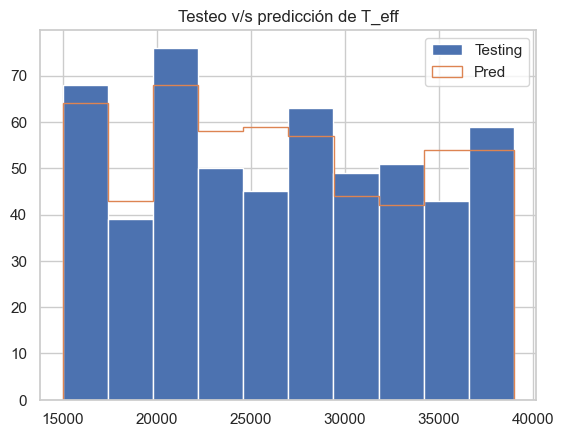

In [40]:
plt.figure()
plt.hist(y_test[:,0], label="Testing")
plt.hist(y_multirf[:,0], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de T_eff")
plt.legend(loc="best")
plt.show()

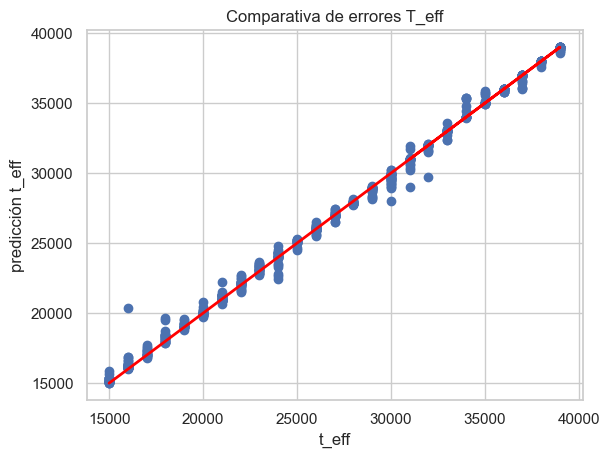

In [41]:
plt.figure()
plt.plot( y_test[:,0],y_multirf[:,0],'o')
plt.title("Comparativa de errores T_eff")
plt.plot(y_test[:,0], y_test[:,0], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción t_eff")
plt.xlabel("t_eff")
plt.show()

### Gravedad superficial (log g)

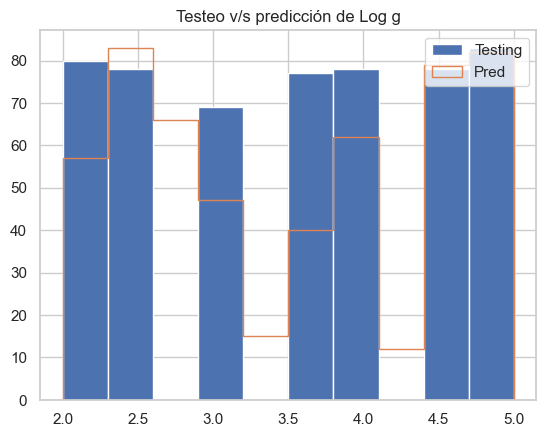

In [42]:
plt.figure()
plt.hist(y_test[:,1], label="Testing")
plt.hist(y_multirf[:,1], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de Log g")
plt.legend(loc="best")
plt.show()

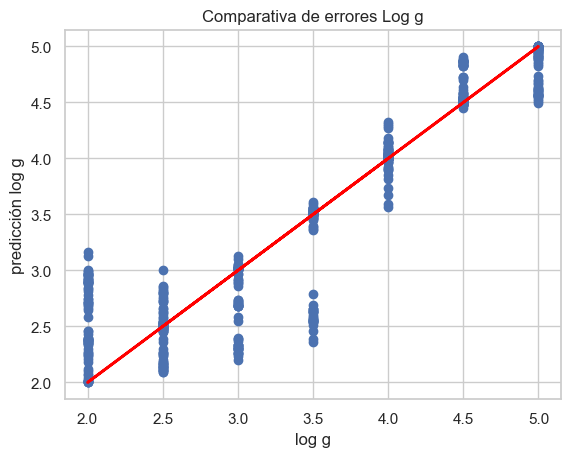

In [43]:
plt.figure()
plt.plot( y_test[:,1],y_multirf[:,1],'o')
plt.title("Comparativa de errores Log g")
plt.plot(y_test[:,1], y_test[:,1], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción log g")
plt.xlabel("log g")
plt.show()

Text(0, 0.5, 'predicción log g')

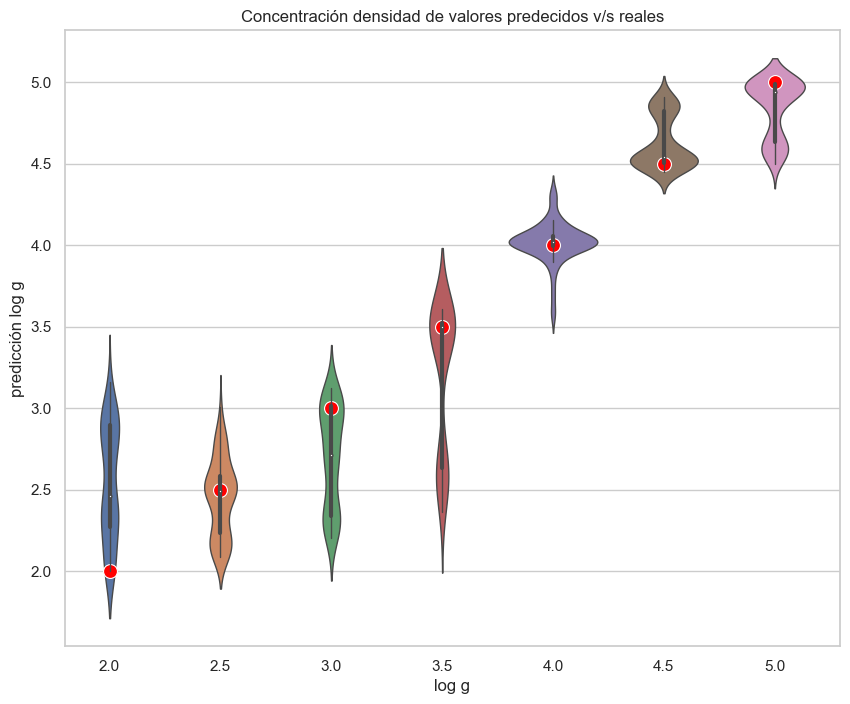

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.violinplot(x =y_test[:,1], y =y_multirf[:,1], linewidth = 1, ax=ax).set(title='Concentración densidad de valores predecidos v/s reales')
sns.scatterplot(data=np.unique(y_test[:,1]),color = 'red',s=100,marker= "o", ax=ax)

plt.xlabel('log g')
plt.ylabel('predicción log g')

### Velocidad de rotación (Vroot)

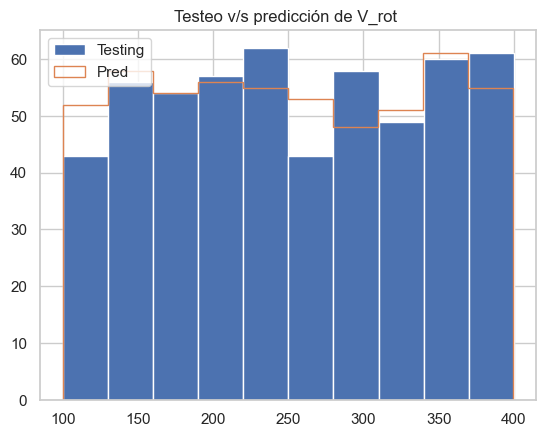

In [45]:
plt.figure()
plt.hist(y_test[:,2], label="Testing")
plt.hist(y_multirf[:,2], label="Pred", histtype='step')
plt.title("Testeo v/s predicción de V_rot ")
plt.legend(loc="best")
plt.show()

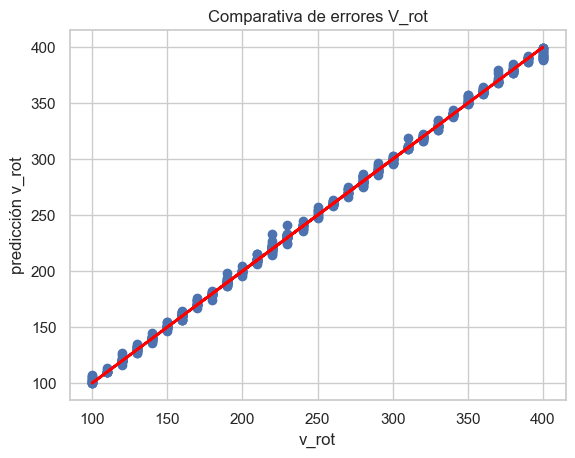

In [46]:
plt.figure()
plt.title("Comparativa de errores V_rot")
plt.plot( y_test[:,2],y_multirf[:,2],'o')
plt.plot(y_test[:,2], y_test[:,2], color='red', linewidth='2.0', linestyle='-')
plt.ylabel("predicción v_rot")
plt.xlabel("v_rot")
plt.show()

# FASE 4 - PREDICCIÓN

### Estrella HD33328

In [47]:
df = pd.read_csv("BESOS/2_Be_stars/HD33328/PUCHEROS/hd33328_2013-02-26_00-55-34_final_corr.txt", sep="\t", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

n = 201  # for 2 random indices
index = np.random.choice(df2[0].shape[0], n, replace=False) 

/var/folders/wv/6gcw11vd29dd2c9_187t7rf80000gn/T/ipykernel_4056/3420312229.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


In [48]:
index.sort()

In [49]:
obs_wave = df2[0].values[index]
obs_flux = df2[1].values[index]

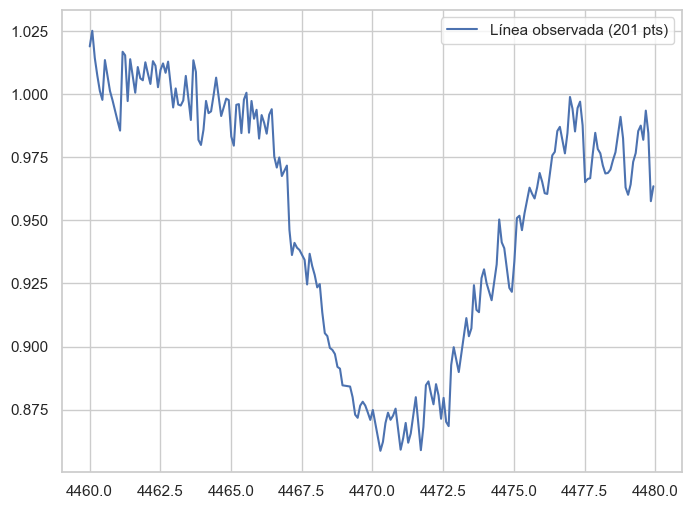

In [50]:
plt.figure(figsize=(8,6))
plt.plot(obs_wave, obs_flux, label="Línea observada (201 pts)")
#plt.plot(df4[0], df4[1], label="Modelo")
plt.legend(loc="best")
plt.show()

In [51]:
pred_obs = model.predict(obs_flux.reshape(1,201))

In [52]:
pred_obs

array([[2.83500000e+04, 3.57743451e+00, 2.76798535e+02]])

In [53]:
print("Parámetros estelares obtenidos mediante predicción - estrella HD33328\n")
print("Teff: ",pred_obs[0,0])
print("Log(g): ",pred_obs[0,1])
print("Vroot: ",pred_obs[0,2])

Parámetros estelares obtenidos mediante predicción - estrella HD33328

Teff:  28350.0
Log(g):  3.5774345057720063
Vroot:  276.7985350877193


Valores reales de parámetros estelares - estrella HD33328

Teff: $19526 ± 195$

Log(g):  $3.3 ± 0.03$

Vroot:  $287 ± 6$

In [54]:
#Variables de parámetros reales BESOS estrella HD33328

Teff_HD33328=19526
logg_HD33328=3.00
vroot_HD33328=287

### Comparación de resultados

In [55]:

def dif_absoluta(v_real,v_predict):
    return abs(v_real-v_predict)

def dif_porcentual(v_real, v_predict):
    return abs(((v_predict/v_real) * 100) - 100)

In [56]:
print("Temperatura efectiva (Teff)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(Teff_HD33328,pred_obs[0,0]))
print("\tDiferencia porcentual: ",dif_porcentual(Teff_HD33328,pred_obs[0,0]) , "%")

print("\nGravedad superficial (Log g)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(logg_HD33328,pred_obs[0,1]))
print("\tDiferencia porcentual: ",dif_porcentual(logg_HD33328,pred_obs[0,1]), "%")

print("\nVelocidad de rotación (Vroot)\n")
print("\tDiferencia Absoluta: ",dif_absoluta(vroot_HD33328,pred_obs[0,2]))
print("\tDiferencia porcentual: ",dif_porcentual(vroot_HD33328,pred_obs[0,2]), "%")

Temperatura efectiva (Teff)

	Diferencia Absoluta:  8824.0
	Diferencia porcentual:  45.19102734815118 %

Gravedad superficial (Log g)

	Diferencia Absoluta:  0.5774345057720063
	Diferencia porcentual:  19.247816859066873 %

Velocidad de rotación (Vroot)

	Diferencia Absoluta:  10.201464912280699
	Diferencia porcentual:  3.554517391038573 %
